In [ ]:
__authors__    = "Ruben Dario Guerrero, PhD"
__credits__   = ["Ruben Dario Guerrero, PhD"]
__copyright_amp__ = "(c) Ruben Dario Guerrero"
__email__   = "ruben.guerrero@javerianacali.edu.co"
__license__   = "cc0-1.0"
__date__      = "2021-09-16"

In [ ]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/Colab_Notebooks/dispositivos_electronicos
%ls

# Fundamentos de física de dispositivos electrónicos


Se puede transmitir una comprensión física de cómo funcionan los dispositivos semiconductores sin profundizar demasiado en la física de los semiconductores, pero es necesaria una comprensión básica de algunos conceptos clave a nivel de un curso de introducción a la física del estado sólido o dispositivos semiconductores. Esta seccion resumirá algunos conceptos esenciales. 


## De los niveles de energía a las bandas de energía

### Niveles de energía discretos y estructura atómica

####Niveles atómicos

La solucion de la ecuación de Schrödinger describe los niveles de energía de un atomó en el que no se tiene en cuuenta la interacción entre electrones. Tiene la siguiente forma:
$$
E \psi=-\frac{\hbar^{2}}{2 \mu} \nabla^{2} \psi-\frac{Z q^{2}}{4 \pi \varepsilon_{0} r} \psi
$$
Dond $q$ es la carga del electrón, $e r$ es la posicion del electrón relativa al nucleo, $|\vec r|= r$ s la distancia al nuucleo, $Z$ es la carga del nuecleo $\varepsilon_{0}$ es la permitividad del vacio y finalmente
$$
\mu=\frac{m_{q} m_{p}}{m_{q}+m_{p}},
$$
es la masa reducida del electrón, siendo $m_{p}$ la masa del protón y $m_{q}$ la masa del electrón.
Típicamente esta ecuación se resuelve planteado una separación de variables como siguue:
$$
\psi(r, \theta, \varphi)=R(r) Y_{\ell}^{m}(\theta, \varphi)=R(r) \Theta(\theta) \Phi(\varphi)
$$
Donde $R$ es la función radial y $Y_{\ell}^{m}$ son los esféricos armónicos dee grado $\ell$ y orden $m$. El caso $Z=1$ s el único cuya solución analítica exacta se conoce: 
$$
\psi_{n \ell m}(r, \theta, \varphi)=\sqrt{\left(\frac{2}{n a_{0}}\right)^{3} \frac{(n-\ell-1) !}{2 n[(n+t) !]}} e^{-r / n a_{0}}\left(\frac{2 r}{n a_{0}}\right)^{\ell} L_{n-\ell-1}^{2 \ell+1}\left(\frac{2 r}{n a_{0}}\right) \cdot Y_{\ell}^{m}(\theta, \varphi)
$$
Donde se ha definido el rádio de Bohr,
$$
a_{0}=\frac{4 \pi \varepsilon_{0} \hbar^{2}}{m_{q} q^{2}} \approx 0.52 \unicode{x212B}
$$
Los polinómios ganaralizados de Laguerre, $L_{n-\ell-1}^{2 \ell+1}(\cdots)$, y los númueros cuánticos principal, $n$, azimutal, $\ell$, y magnético, $m$. los números cuánticos toman valores que satisfacen las siguientes condiciones:
$$
\begin{array}{l}
n=1,2,3, \ldots \\
\ell=0,1,2, \ldots, n-1 \\
m=-\ell, \ldots, \ell
\end{array}
$$
La strcutura de capas de un átomo se origina por el número cuántico $\ell$ y a cada capa se le asigna una letra según el valor de $\ell$:

$\ell$ | Letra      | # orbitales
--|:---------:|:-----------:
0|S      | 1
1|P   | 3
2|D   | 5
3|F   | 7
4|G   | 9
5|H   | 11
6|I   | 13

Cada orbital puede acomodar bien sea dos electrones (uno con espin $\uparrow$ y otro con espin $\downarrow$), o un espin (con espin $\uparrow$ o $\downarrow$), o ninguno.

#### Como lucen los orbitales?

En este dominio, generalmente se definen incluyendo un factor de $ (- 1) ^ m $ (la convención de fase de Condon-Shortley):
$$
Y_{l}^{m}(\theta, \varphi)=(-1)^{m} \sqrt{\frac{(2 l+1)}{4 \pi} \frac{(l-m) !}{(l+m) !}} P_{lm}(\cos \theta) e^{i m \varphi}
$$
donde $ P_{lm}(\cos \theta) $ es un polinomio de Legendre asociado (sin el factor de $ (- 1) ^ m $).

Dado que $Y_{l}^{m}(\theta, \varphi)$ son funciones complejas de ángulo, a menudo se considera más conveniente usar sus formas reales para su representación en figuras y en algunos cálculos. Una base real adecuada de armónicos esféricos puede definirse como:
$$
Y_{l m}=\left\{\begin{array}{ll}
\sqrt{2}(-1)^{m} \operatorname{Im}\left[Y_{l}^{|m|}\right] & \text { if } m<0 \\
Y_{l}^{0} & \text { if } m=0 \\
\sqrt{2}(-1)^{m} \operatorname{Re}\left[Y_{l}^{m}\right] & \text { if } m>0
\end{array}\right.
$$
El siguiente código utiliza la rutina special.sph_harm de SciPy para calcular los armónicos esféricos, que luego se convierten en estas funciones reales y se muestran en un diagrama de Matplotlib tridimensional. 

In [ ]:
# dependences for ploting solid harmonics
!dpkg --configure -a
!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng
%matplotlib inline

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# The following import configures Matplotlib for 3D plotting.
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import sph_harm
plt.rc('text', usetex=True)

# Grids of polar and azimuthal angles
theta = np.linspace(0, np.pi, 100)
phi = np.linspace(0, 2*np.pi, 100)
# Create a 2-D meshgrid of (theta, phi) angles.
theta, phi = np.meshgrid(theta, phi)
# Calculate the Cartesian coordinates of each point in the mesh.
xyz = np.array([np.sin(theta) * np.sin(phi),
                np.sin(theta) * np.cos(phi),
                np.cos(theta)])

def plot_Y(ax, el, m):
    """Plot the spherical harmonic of degree el and order m on Axes ax."""

    # NB In SciPy's sph_harm function the azimuthal coordinate, theta,
    # comes before the polar coordinate, phi.
    Y = sph_harm(abs(m), el, phi, theta)

    # Linear combination of Y_l,m and Y_l,-m to create the real form.
    if m < 0:
        Y = np.sqrt(2) * (-1)**m * Y.imag
    elif m > 0:
        Y = np.sqrt(2) * (-1)**m * Y.real
    Yx, Yy, Yz = np.abs(Y) * xyz

    # Colour the plotted surface according to the sign of Y.
    cmap = plt.cm.ScalarMappable(cmap=plt.get_cmap('YlGn'))
    cmap.set_clim(-0.5, 0.5)

    ax.plot_surface(Yx, Yy, Yz,
                    facecolors=cmap.to_rgba(Y.real),
                    rstride=2, cstride=2)

    # Draw a set of x, y, z axes for reference.
    ax_lim = 0.5
    ax.plot([-ax_lim, ax_lim], [0,0], [0,0], c='0.5', lw=1, zorder=10)
    ax.plot([0,0], [-ax_lim, ax_lim], [0,0], c='0.5', lw=1, zorder=10)
    ax.plot([0,0], [0,0], [-ax_lim, ax_lim], c='0.5', lw=1, zorder=10)
    # Set the Axes limits and title, turn off the Axes frame.
    ax.set_title(r'$Y_{{{},{}}}$'.format(el, m))
    ax_lim = 0.5
    ax.set_xlim(-ax_lim, ax_lim)
    ax.set_ylim(-ax_lim, ax_lim)
    ax.set_zlim(-ax_lim, ax_lim)
    ax.axis('off')

fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(projection='3d')
l, m = 3, 0
plot_Y(ax, l, m)
plt.savefig('Y{}_{}.png'.format(l, m))
plt.show()

To plot a family of shell:

In [ ]:
el_max = 5
figsize_px, DPI = 800, 100
figsize_in = figsize_px / DPI
fig = plt.figure(figsize=(figsize_in, figsize_in), dpi=DPI)
spec = gridspec.GridSpec(ncols=2*el_max+1, nrows=el_max+1, figure=fig)
for el in range(el_max+1):
    for m_el in range(-el, el+1):
        print(el, m_el)
        ax = fig.add_subplot(spec[el, m_el+el_max], projection='3d')
        plot_Y(ax, el, m_el)
plt.tight_layout()
#plt.savefig('sph_harm.png')
plt.show()

#### Cual es la nergía por orbital?

Se puede utilizar el paquete Symbolic Python (SymPy) para obtener las soluciones aproximadas para atomos hidrogenoides.

In [ ]:
from __future__ import division
from sympy import  symbols
n,l,m,Z = symbols('n l m Z')
from sympy.physics.hydrogen import E_nl, R_nl,Psi_nlm

In [ ]:
help(Psi_nlm)

In [ ]:
help(E_nl)

In [ ]:
from sympy.abc import n, Z
E_nl(1, 1)*13.6

In [ ]:
help(R_nl)

### Varios niveles de energía agrupados forman bandas de energía 

Nos concentraresmos en el caso del átomo de silicio. El silicio tiene un número atómico de 14; tiene 14 electrones cuyo negativo
 las cargas están equilibradas por las cargas positivas de 14 protones en el
 núcleo. Aprendemos en química de primer año que estos catorce electrones
 ocupan varios niveles de energía asociados con los orbitales moleculares. los
 El nivel de energía más bajo es el orbital $ n  = 1s$, que puede acomodar dos
 electrones (uno con espín $\uparrow$ y el otro con espín $\downarrow$). El siguiente nivel de energía es el orbital  $n = 2S$, que puede acomodar dos
 electrones (uno con espín $\uparrow$ y el otro con espín $\uparrow$), Luego los tres orbitales $n= 2p$ $p_x$, $p_y$ y $p_z$. Cada uno de los tres orbitales $p$ puede acomodar dos electrones (uno con espín $\uparrow$ y el otro con espín $\downarrow$) seis electrones en total.
 Los siguientes son los orbitales $n=3s$ que puede acomodar dos electrones (uno con espín $\uparrow$ y el otro con espín $\downarrow$),   y $n=3p$ que acomoda los dos electrones restantes, estos se acomodan de tal manera los dos espines bien sea $\uparrow$ o $\downarrow$ quedan en orbitales separados, estos cuatro electrones se denominan electrones de valencia.
La configuración orbital para Si es $1 s^{2} 2 s^{2} 2 p^{6} 3 s^{2} 3 p^{2}$.

Por otra parte para el nivel $n=3$ se tienen las capas $3s$ y $3p$ que ofrecen ocho estados para comodar electrones y salvo los cuatro orbitales ocupados por los electrones de valencia que son responsables del enlace químico,  nos quedan cuatro orbitales más y al modificar la población de estos orbitales de diferentes formas se pueden  generar diferentes dispositivos electrónicos.

El semiconductor utilizado para la mayoría de los dispositivos semiconductores, como los transistores, es el silicio, y la mayoría de los transistores de silicio están fabricados con silicio monocristalino de alta calidad en el que cada átomo de silicio se une covalentemente con los cuatro vecinos más cercanos en la llamada estructura reticular de diamante. La densidad de los átomos de Si es aproximadamente $N_A = 5 × 10^{22} cm^{−3}$, y el espaciado vecino más cercano es $0.235 nm$. Dado que había ocho estados de electrones de valencia con 4 de ellos ocupados para cada átomo de Si, esperamos encontrar $8 \times N_A$ estados de valencia en el cristal con $4\times N_A$ de ellos ocupados. Eso es lo que sucede, pero la interacción cuántica de los electrones desplaza las energías y las amplía. La mitad de los estados disminuyen en energía y se convierten en los "estados de enlace" responsables de los enlaces covalentes en la red de Si, y la otra mitad de los estados (los estados anti-enlace) aumentan en energía.

Los niveles de energía de electrones llenos de 4NA se convierten en estados ocupados por $4\times N_A$ en un rango de energías llamado banda de valencia (como se muestra en la figura de abajo). Los estados desocupados $4\times N_A$ se convierten en una banda de estados desocupados conocida como banda de conducción (como se muestra en la figura de abajo). En la figura de abajo, la parte superior de la banda de valencia está separada de la parte inferior de la banda de conducción por una "brecha de energía" (o banda prohibida), que es aproximadamente $1.12 eV$ para Si. En $T = 0K$, todos los estados $4\times N_A$ en la banda de valencia están ocupados y todos los estados $4\times N_A$ en la banda de conducción están vacíos.
A una temperatura finita, la red de Si vibra y tiene una energía térmica promedio de $3k_B T / 2$, donde $k_B$ es la constante de Boltzman. A temperatura ambiente, $T = 300 K$, $k_B T = 0.026 eV$, que es aproximadamente $40$ veces más pequeño que el intervalo de banda del Si. En promedio, no hay suficiente energía térmica disponible para romper los enlaces covalentes y promover electrones de la banda de valencia a la banda de conducción, pero existe una pequeña probabilidad de excitar térmicamente un electrón de la banda de valencia a la banda de conducción. Como se muestra en la figura de abajo, esto significa que habrá una pequeña probabilidad de estados vacíos (llamados huecos) en la valencia y una pequeña probabilidad de estados llenos cerca de la parte inferior de la banda de conducción. La densidad de electrones en la banda de conducción es igual a la densidad de los huecos en la banda de valencia y se conoce como la *concentración de portador intrínseco*, $n_i$. Para el silicio a temperatura ambiente, $ni \approx 10^{10} cm ^{− 3 }$.
 
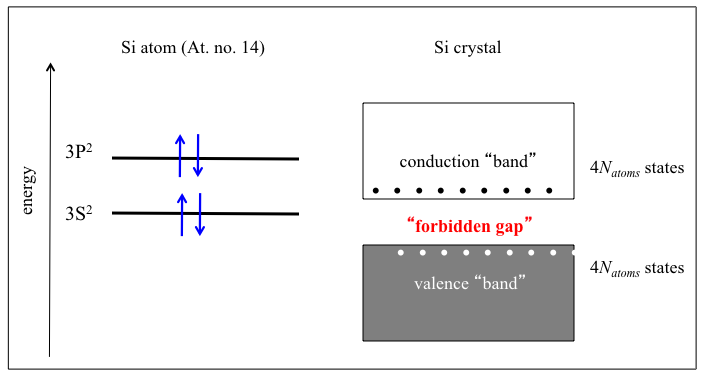

Un MOSFET de Si (uno de los dispositivos semiconductores más importantes) consta de un electrodo de compuerta metálico y contactos de fuente y drenaje, un aislante de compuerta de $SiO_2$ y el sustrato de Si. La figura de abajo ilustra las diferencias entre las bandas de energía de estos materiales. En un aislante, la banda de valencia está llena de electrones, pero la banda prohibida es muy grande, por lo que prácticamente no hay probabilidad de promover un electrón de la banda de valencia a la banda de conducción, por lo que no existen huecos en la banda de valencia ni electrones en la banda de conducción. Un metal es diferente porque los estados de los electrones se llenan hasta la mitad de una banda. Los metales conducen muy bien la electricidad y los aislantes tienen una conductividad insignificante. En un semiconductor, podemos cambiar el número de huecos en la banda de valencia y electrones en la banda de conducción variando la temperatura o introduciendo una pequeña concentración de dopantes en la red de Si. Se puede hacer que la conductividad de un semiconductor varíe en muchos órdenes de magnitud, desde casi metálico hasta casi aislante, que es lo que
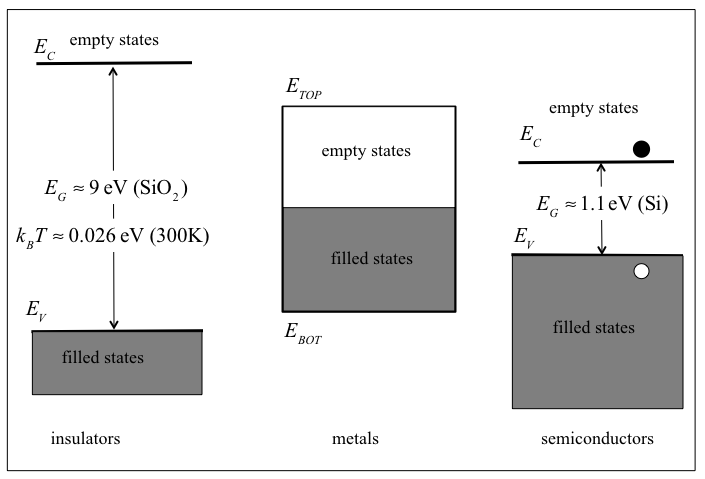

A temperatura ambiente, existe suficiente energía térmica para romper algunos de los enlaces covalentes, un proceso que se conoce como generación térmica. Cuando se rompe un enlace covalente, se libera un electrón. El electrón libre puede alejarse de su átomo padre y está disponible para conducir corriente eléctrica si se aplica un campo eléctrico al cristal. Cuando el electrón abandona su átomo padre, deja una carga neta positiva, igual a la magnitud de la carga del electrón. Por lo tanto, un electrón de un átomo vecino puede ser atraído por esta carga positiva y dejar su átomo original. Esta acción llena el "hueco" que existía en el átomo ionizado, pero crea un nuevo hueco en el otro átomo. Este proceso puede repetirse, con el resultado de que efectivamente tenemos un portador cargado positivamente, o un hueco, que se mueve a través de la estructura del cristal de silicio y está disponible para conducir la corriente eléctrica. La carga de un agujero es igual en magnitud a la carga de un electrón. Por lo tanto, podemos ver que a medida que aumenta la temperatura, se rompen más enlaces covalentes y se generan pares electrón-hueco. El aumento en el número de electrones libres y huecos da como resultado un aumento en la conductividad del silicio.

La generación térmica da como resultado electrones libres y huecos en igual número y, por tanto, concentraciones iguales, donde la concentración se refiere al número de portadores de carga por unidad de volumen ($cm^3$). Los electrones libres y los huecos se mueven aleatoriamente a través de la estructura del cristal de silicio y, en el proceso, algunos electrones pueden llenar algunos de los huecos. Este proceso, llamado recombinación, resulta en la desaparición de electrones libres y huecos. La tasa de recombinación es proporcional al número de electrones libres y huecos, que a su vez está determinada por la tasa de generación térmica. Este último es una función importante de la temperatura. En equilibrio térmico, la tasa de recombinación es igual a la tasa de generación, y se puede concluir que la concentración de electrones libres n es igual a la concentración de huecos p,
$$
n=p=n_{i} \tag{3.1}
$$
donde $n_i$ denota el número de electrones libres y huecos en una unidad de volumen ($cm^3$) de intrínseca
silicio a una temperatura determinada. Los resultados de la física de semiconductores dan $n_i$ como
$$
n_{i}=B T^{3 / 2} e^{-E_{g} / 2 k_{B} T} \tag{3.2}
$$
donde $ B $ es un parámetro dependiente del material que es $ 7.3 \times 10^{15}\mathrm{~ cm}^{- 3}\mathrm{~ K}^{- 3/2} $ para silicio; $ T $ es la temperatura en $ K$; $E_{g}$, un parámetro conocido como energía de banda prohibida, es $ 1.12 $ electronvoltio (eV) para silicio y $k_{B}$ es la constante de Boltzmann $ \left(8.62 \times 10 ^ {- 5 } \mathrm{eV}/ \mathrm{K}\right) $. Es interesante saber que la energía de banda prohibida $ E_ {g} $ es la energía mínima requerida para romper un enlace covalente y generar así un par electrón-hueco.

Finalmente, es útil para propósitos futuros expresar el producto de la concentracion de huecos y la concentración de electrones libres como
$$
p n = n_ {i} ^ {2} \tag{3.3}
$$
donde para el silicio a temperatura ambiente, $ n_ {i} \simeq 1.5 \times 10^{10} / \mathrm{cm}^{3} $. Como se verá en la siguieente sección, esta relación se extiende también al silicio extrínseco o dopado.

####Ejemplo

Calcule el valor de $n_i$ para el silicio a temperatura ambiente ($T \simeq 300$ Kelvin).

#####Solución

In [ ]:
import math
#Variable Declaration

B = 7.3*10**15      # Parameter for Si
T = 300             # Temperature in Kelvin
E_g = 1.12          # Gap energy for Si
k_B = 8.62*10**-5   # Boltzman constant in eV/Kelvin

# Calculations

exp_arg = -E_g/(2*k_B*T)
n_i = B*T**(3/2)*math.exp(exp_arg)
print("n_i = {:.4E}".format(n_i))

Aunque este número parece grande, para ponerlo en contexto, tenga en cuenta que el silicio tiene $ 5\times 10^{22} $ átomos $ / \mathrm{cm}^{3} $. Por lo tanto, a temperatura ambiente, solo uno de cada $ 5 \times 10^{12} $ átomos está ionizado y contribuye con un electrón libre y un hueco.

### El dopaje y la densidad de portadores

Lo que hace que los semiconductores sean tan útiles en la fabricación de dispositivos electrónicos es el hecho de que en un semiconductor es posible cambiar fácilmente las densidades de los huecos en la banda de valencia y los electrones en la banda de conducción. Dicho de otra manera, se puede colocar el nivel de Fermi desde cerca de la parte superior de la banda de valencia hasta cerca de la parte inferior de la banda de conducción o en cualquier punto intermedio. Una forma de hacerlo es dopando el semiconductor. (Otra forma es usar una compuerta para cambiar el potencial electrostático dentro del semiconductor, en argot más tecnico *gating*.) La figura de abajo ilustra cómo dopar un semiconductor sustituyendo átomos de Si por una pequeña concentración de átomos dopantes. El diagrama bidimensional pretende ilustrar el enlace tridimensional en el que cada átomo de Si forma enlaces químicos con cuatro vecinos más cercanos. Si un átomo de Si (en la columna IV de la tabla periódica con cuatro electrones de valencia) es reemplazado por un elemento como fósforo o arsénico de la columna V con cinco electrones de valencia, entonces el dopante forma enlaces covalentes con los cuatro vecinos de silicio, pero el quinto electrón de valencia está débilmente ligado. La pequeña cantidad de energía térmica disponible a temperatura ambiente puede romper este enlace débil y promover el electrón a la banda de conducción de Si dejando atrás un átomo dopante cargado positivamente porque ha perdido un electrón.
La figura d abajo también muestra lo que sucede cuando un dopante de la columna III de la tabla periódica (por ejemplo, boro) se sustituye por un átomo de Si. En este caso, el dopante tiene tres electrones de valencia, por lo que puede formar enlaces covalentes con tres de los cuatro vecinos. Solo se necesita un poco de energía térmica para remover un electrón de un enlace Si$:$Si y colocarlo en el sitio dopante y llenar el enlace covalente faltante. El dopante ahora tiene carga negativa porque tiene un electrón extra, pero nos falta un enlace Si$:$Si, por lo que hemos creado un hueco en la banda de valencia. Al introducir pequeñas cantidades de impurezas de la columna V o de la columna III en la red de Si, podemos controlar la cantidad de electrones en la banda de conducción y los huecos en la banda de valencia.
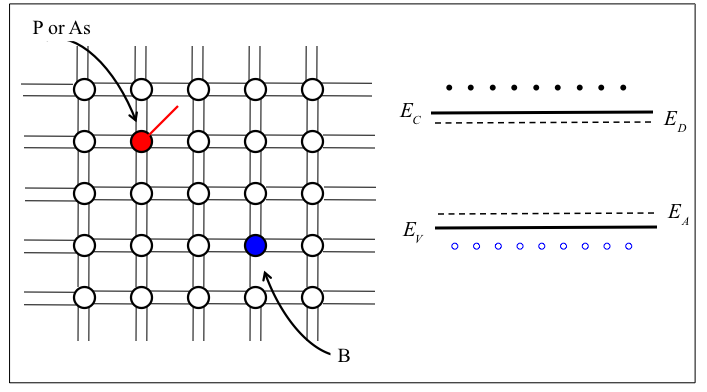

El dopaje implica la introducción de átomos de impurezas en el cristal de silicio en cantidades suficientes para aumentar sustancialmente la concentración de electrones libres o huecos, pero con poco o ningún cambio en las propiedades cristalinas del silicio. Para aumentar la concentración de electrones libres, n, el silicio se dopa con un elemento con una valencia de 5, como el fósforo (P). Se dice entonces que el silicio dopado resultante es de tipo n. Para aumentar la concentración de huecos, p, el silicio se dopa con un elemento que tiene una valencia de 3, como el boro (B), y se dice que el silicio dopado resultante es de tipo p.

Los átomos dopantes (fósforo) reemplazan algunos de los átomos de silicio en la estructura cristalina. Dado que el átomo de fósforo tiene cinco electrones en su capa exterior, cuatro de estos electrones forman enlaces covalentes con los átomos vecinos y el quinto electrón se convierte en un electrón libre. Así, cada átomo de fósforo dona un electrón libre al cristal de silicio y la impureza de fósforo se denomina donante. Sin embargo, debe quedar claro que este proceso no genera huecos. La carga positiva neta asociada con el átomo de fósforo es una carga unida que no se mueve a través del cristal. Si la concentración de átomos donantes es $ N_{D} $, donde $ N_{D} $ suele ser mucho mayor que $ n_{i} $, la concentración de electrones libres en el silicio de tipo $ n $ será
$$
n_ {n} \simeq N_{D} \tag{3.4}
$$
donde el subíndice $ n $ denota silicio de tipo $ n $. Así, $ n_ {n} $ está determinado por la concentración de dopaje y no por la temperatura. Sin embargo, este no es el caso de la concentración de agujeros. Todos los agujeros en el silicio de tipo $ n $ son los generados por ionización térmica. Su concentración $ p_ {n} $ se puede encontrar, siempre que se logre el equilibrio térmico. Por lo tanto, para silicio de tipo $ n $
$$
p_{n} n_{n} = n_{i}^{2} 
$$
Sustituyendo $ n_{n} $, obtenemos por $ p_{n} $
$$
p_{n} \simeq \frac {n_{i}^{2}}{N_{D}} \tag{3.5}
$$
Así, $ p_{n} $ tendrá la misma dependencia de la temperatura que la de $ n_{i}^{2}. $ Finalmente, observamos que en el silicio de tipo $n$ la concentración de electrones libres $ n_{n} $ será mucho más grande que el de los agujeros. Por lo tanto, se dice que los electrones son los portadores de carga mayoritarios y los huecos son los portadores de carga minoritarios en el silicio de tipo $n$.

Para obtener silicio de tipo $p$ en el que los huecos son los portadores de carga mayoritarios, se utiliza una impureza trivalente como el boro.  Tenga en cuenta que los átomos de boro reemplazan algunos de los átomos de silicio en la estructura del cristal de silicio. Dado que cada átomo de boro tiene tres electrones en su capa exterior, acepta un electrón de un átomo vecino, formando así enlaces covalentes. El resultado es un agujero en el átomo vecino y una carga negativa ligada en el átomo aceptor (boro). De ello se deduce que cada átomo aceptor proporciona un agujero. Si la concentración de dopaje del aceptador es $ N_{A} $, donde $N_{A}\gg n_{i} $, la concentración de huecos se convierte en
$$
p_ {p} \simeq N_ {A} \tag{3.6}
$$
donde el subíndice $ p $ denota silicio de tipo $ p $. Por lo tanto, aquí los portadores mayoritarios son huecos y su concentración está determinada por $N_{A}$. La concentración de electrones minoritarios se puede encontrar usando la relación
$$
p_{p} n_{p} = n_{i}^{2}
$$
y sustituyendo $ p_{p} $,
$$
n_{p} \simeq \frac{n_{i}^{2}}{N_ {A}} \tag{3.7}
$$
Por tanto, la concentración de los electrones minoritarios tendrá la misma dependencia de la temperatura que la de $ n_{i}^{2} $.

Debe enfatizarse que una pieza de silicio de tipo $n$ o de tipo $p$ es eléctricamente neutra; la carga de la mayoría de los portadores libres (electrones en el tipo $n$ y huecos en el silicio tipo $p$) es neutralizada por las cargas ligadas asociadas con los átomos de impureza.

####Ejemplo

Considere un silicio de tipo $ n $ para el cual la concentración de dopante $ N_{D} = 10^{17} / \mathrm {cm} ^ {3} $. Encuentre las concentraciones de electrones y huecos en $ T = 300 \mathrm {~ K} $.

#####Solución

La concentración de la mayoría de electrones es
$$
n_ {n} \simeq N_{D} = 10 ^ {17} / \mathrm{cm} ^ {3}
$$
La concentración de los huecos minoritarios es
$$
p_ {n} \simeq \frac{n_{i}^{2}}{N_{D}}
$$
En el Ejemplo anterior encontramos que en $ T = 300 \mathrm{~ K}, n_{i} = 1.5 \times 10 ^ {10} / \mathrm {cm} ^ {3} $. Por lo tanto,
$$
p_ {n} = \frac{\left(1.5 \times 10 ^ {10} \right)^{2}}{10^{17}} 
$$
$$
p_{n} =  2.25 \times 10^{3} / \mathrm{cm}^{3}
$$
Observe que $ n_{n}\gg n_{i} $ y que $ n_{n} $ es mucho más alto que $ p_{n} $.

### Flujo de corriente en semiconductores

Hay dos mecanismos claramente diferentes para el movimiento de los portadores de carga y, por lo tanto, para el flujo de corriente en los semiconductores: arrastre y difusión.

#### Conducción por arrastre

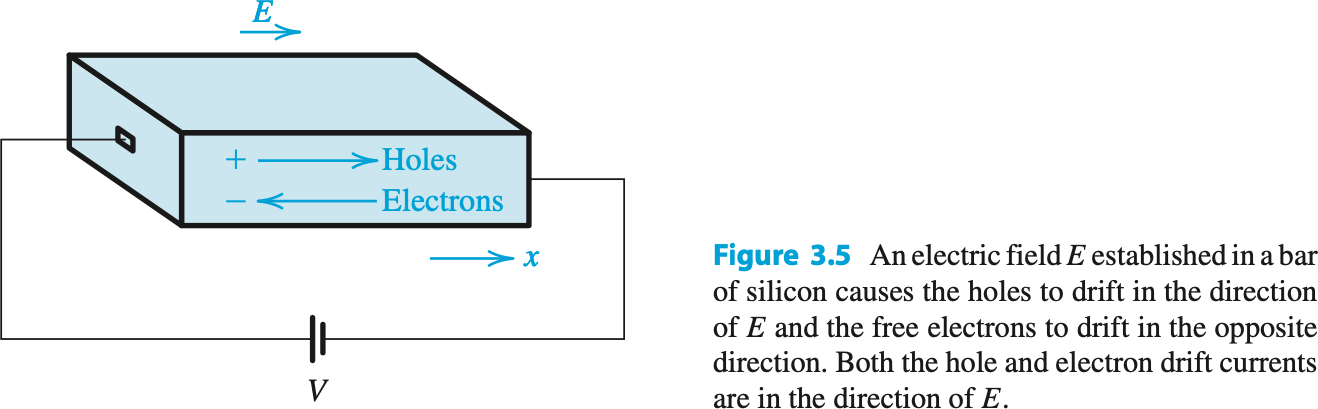

Cuando se establece un campo eléctrico $ E $ en un cristal semiconductor, los huecos se aceleran en la dirección de $ E $ y los electrones libres se aceleran en la dirección opuesta a la de $ E $. Los huecos adquieren una velocidad $ v_ {p \text{-drift}} $ dada por
$$
v_ {p\text{-drift}} = \ mu_ {p} E \tag{3.8}
$$
donde $\ mu_{p} $ es una constante llamada movilidad del hueco: representa el grado de facilidad con que los huecos se mueven a través del cristal de silicio en respuesta al campo eléctrico $E$. Dado que la velocidad tiene las unidades de centímetros por segundo y $ E $ las unidades de voltios por centímetro, vemos en la Ec. (3.8) que la movilidad $\mu_{p} $ debe tener las unidades de centímetros al cuadrado por voltio-segundo $\left (\mathrm{cm}^{2} /\mathrm {V} \cdot \mathrm{s} \right). $ Para silicio intrínseco $\mu_ {p}=480 \mathrm{~ cm} ^ {2} / \mathrm{V} \cdot\mathrm{s}$

Los electrones libres adquieren una velocidad de arrastre $ v_{n\text{-drift}} $ dada por
$$
v_ {n\text{-drift}} = - \ mu_ {n} E \tag{3.9}
$$
donde el resultado es negativo porque los electrones se mueven en la dirección opuesta a $E$. Aquí $\mu_{n} $ es la movilidad de los electrones, que para el silicio intrínseco es de aproximadamente $1350\mathrm{~ cm}^{2}/\mathrm {V} \cdot s$. Tenga en cuenta que $\mu_{n} $ es aproximadamente $ 2.5 $ veces $ \mu_{p} $, lo que significa que los electrones se mueven con mucha mayor facilidad a través del cristal de silicio que los huecos.

Sea la concentración de huecos $ p $ y la de electrones libres $ n $. Deseamos calcular la componente de corriente debido al flujo de huecos. Considere un plano perpendicular a la dirección $x$. En un segundo, la carga del hueco que cruza ese plano será $ \left(Aqpv_{p \text{-drift}}\right) $ coulombs, donde $ A $ es el área de la sección transversal de la barra de silicio y $ q $ es la magnitud de la carga del electrón. Este debe ser entonces el componente del hueco de la corriente de arrastre que fluye a través de la barra,
$$
I_ {p} = Aqpv_{p \text {-drift}} \tag{3.10}
$$
Sustituyendo $ v_{\text{p-drift}}$, obtenemos
$$
I_ {p} = A q p \ mu_{p} E 
$$
Por lo general, estamos interesados ​​en la densidad corriente $ J_{p} $, que es la corriente por unidad de área de sección transversal,
$$
J_ {p} = \frac {I_{p}} {A} = q p \mu_{p} E \tag{3.11}
$$
La componente de corriente debida a la arrastre de electrones libres se puede encontrar de manera similar. Sin embargo, tenga en cuenta que los electrones que se desplazan de derecha a izquierda dan como resultado una componente de corriente de izquierda a derecha. Esto se debe a la convención de tomar la dirección del flujo de corriente como la dirección del flujo de carga positiva y opuesta a la dirección del flujo de carga negativa. Por lo tanto,
$$
I_{n} = - Aqnv_{n \text{-drift}}
$$
Sustituyendo $ v_ {n\text {-drift}} $, obtenemos la densidad de corriente $ J_ {n} = I_{n}/A$ como
$$
J_{n} = qn\mu_{n} E \tag{3.12}
$$
La densidad de corriente de arrastre total ahora se puede encontrar sumando $ J_ {p} $ y $ J_ {n} $,
$$
J = J_{p} + J_{n} = q \left(p\mu_{p} + n\mu_{n} \right) E \tag{3.13}
$$
Esta relación se puede escribir como
$$
J = \sigma E \tag{3.14}
$$
o equivalentemente
$$
J = E/\rho \tag{3.15}
$$
donde la conductividad $ \sigma $ viene dada por
$$
\sigma = q\left (p\mu_{p} + n\mu_{n} \right) \tag{3.16}
$$
y la resistividad $ \rho $ viene dada por
$$
\rho \equiv \frac{1}{\sigma} = \frac{1}{q \left(p\mu_{p} + n\mu_{n} \tag{3.17}\right)}
$$
Observe que la ecuación antrior para $J$ es una forma de la ley de Ohm y se puede escribir alternativamente como
$$
\rho = \frac{E}{J} \tag{3.18}
$$
Así, las unidades de $\rho $ se obtienen de: $\frac{\mathrm{V}/\mathrm{cm}} {\mathrm{A}/\mathrm{cm}^{2}} = \Omega\cdot\mathrm{cm} $.

#####Ejemplo

Encuentre la resistividad de (a) silicio intrínseco y (b) silicio de tipo $ p $ con $ N_{A} =10^ {16} / \mathrm{cm}^{3} $. Use $ n_{i} = 1.5 \times $ $ 10^{10}/ \mathrm{cm}^{3} $, y asuma que para el silicio intrínseco $ \mu_{n} = 1350 \mathrm {~ cm} ^ { 2} / \mathrm {V} \cdot \mathrm{s} $ y $ \mu_{p} = 480 \mathrm{~ cm} ^ {2}/\mathrm {V} \cdot \mathrm {s} $, y para el silicio dopado $ \mu_{n} = 1110\mathrm{~ cm} ^ {2}/\mathrm{V} \cdot \mathrm{s} $ y $ \mu_{p} = 400\mathrm{~ cm}^{2} / \mathrm {V} \cdot \mathrm {s} $. (Tenga en cuenta que el dopaje reduce la movilidad de los portadores).

######Solución

In [ ]:
import math
#Variable Declaration

p = 1.5*10**10      # Holes  for Si cm^-3
n = 1.5*10**10      # Electrons for Si cm^-3
n_i = 1.5*10**10    # Free electrons for Si cm^-3
q = 1.6*10**-19.    # Electron's charge in Coulomb
N_A = 10**16        # N_A for Si type p
mui_n = 1350        # For intrinsic silicon
mui_p = 480.        # For intrinsic silicon
mud_n = 1110        # For doped silicon
mud_p = 400.        # For doped silicon

# Calculations
# Part (a)
rhoi = 1.0/(q*(mui_p*p+mui_n*n))
print('The resistivity for intrinsic silicon is {:.2E}'.format(rhoi))
#part (b)
# for p silicon p_p approx N_A
p_p = 10**16.       # Number of Si atoms per cm^3
n_p = n_i**2/p_p
rhod = 1.0/(q*(p_p*mud_p+mud_n*n_p))
print('The resistivity for doped silicon is {:.2E}'.format(rhod))

#### Conducción por difusión

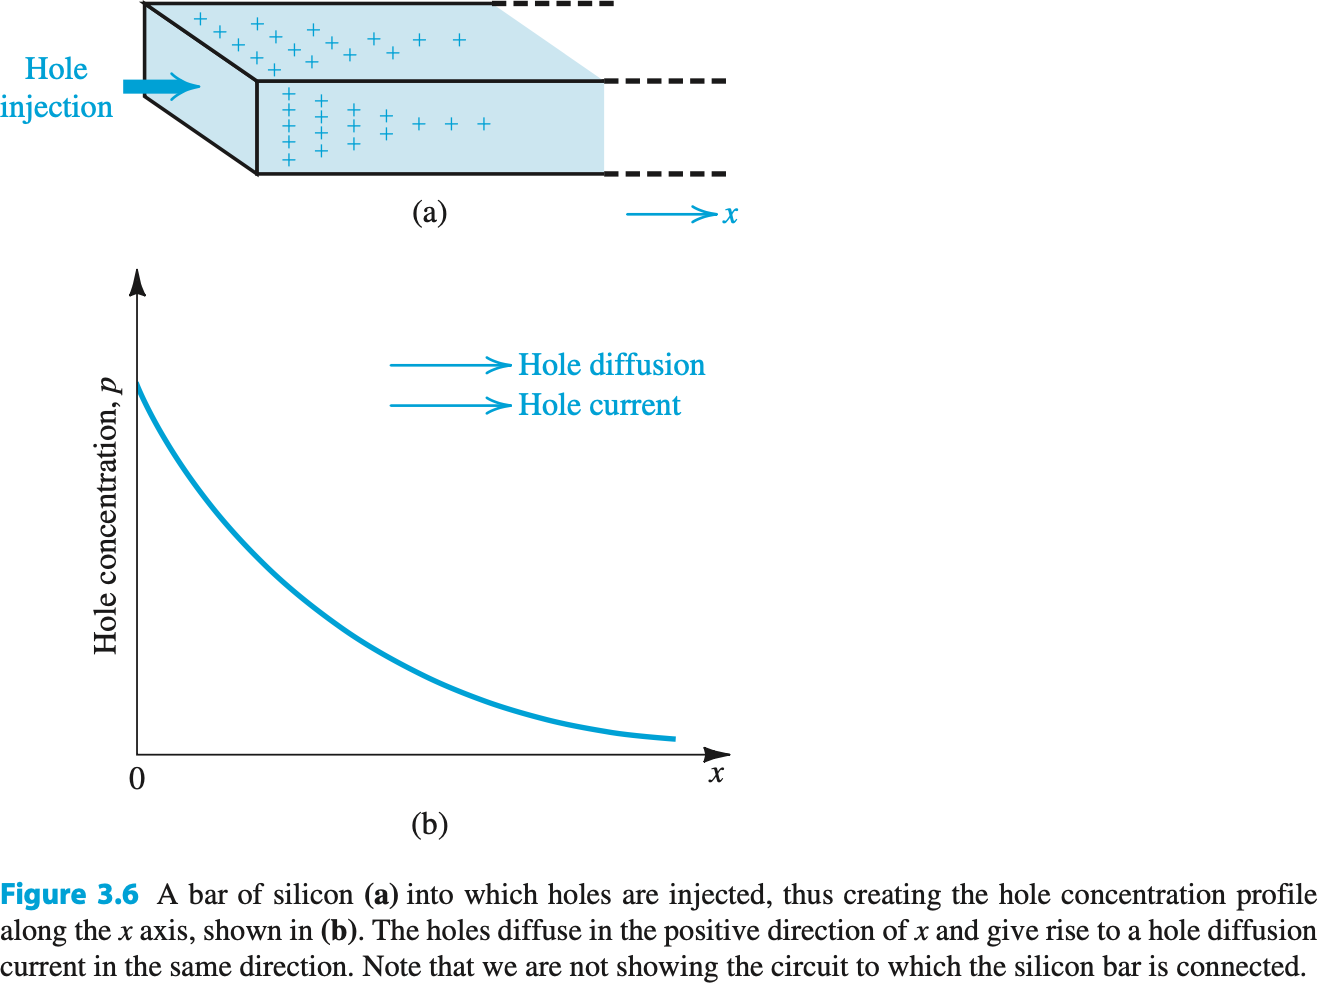

La difusión de portadores ocurre cuando la densidad de los portadores de carga en una pieza de semiconductor no es uniforme. Por ejemplo, si por algún mecanismo la concentración de, digamos, huecos, se hace más alta en una parte de una pieza de silicio que en otra, entonces los huecos se difundirán desde la región de alta concentración a la región de baja concentración. Este proceso de difusión es como el que se observa si se dejan caer unas gotas de tinta en un tanque lleno de agua. La difusión de los portadores de carga da lugar a un flujo neto de carga o corriente de difusión.

Como ejemplo, considere la barra de silicio que se muestra en la figura: Mediante algún proceso no especificado, hemos dispuesto que se inyecten huecos en su lado izquierdo. Esta inyección de huecos continua da lugar y mantiene un perfil de concentración de huecos. Este perfil, a su vez, hace que los huecos se difundan de izquierda a derecha a lo largo de la barra de silicio, lo que da como resultado una corriente de hueco en la dirección $ x $. La magnitud de la corriente en cualquier punto es proporcional a la pendiente del perfil de concentración, o al gradiente de concentración, en ese punto,
$$
J_ {p} = - q D_{p} \frac{dp(x)} {dx} \tag{3.19}
$$


donde $ J_{p} $ es la densidad de corriente del hueco $ \left(\mathrm {A}/\mathrm {cm} ^ {2} \right), q $ es la magnitud de la carga del electrón, $ D_{p} $ es una constante llamada constante de difusión o difusividad de los huecos; y $ p (x) $ es la concentración del hueco en el punto $ x. $ Tenga en cuenta que el gradiente $ (d p / d x) $ es negativo, lo que da como resultado una corriente positiva en la dirección $ x $, como debería esperarse.

En el caso de la difusión de electrones resultante de un gradiente de concentración de electrones (véase la figura 3.7), se aplica una relación similar, que da la densidad de corriente de electrones,
$$
J_{n} = q D_{n} \frac {dn(x)}{dx} \tag{3.20}
$$
donde $ D_{n} $ es la constante de difusión o difusividad de los electrones. Observe que un $ (d n / d x) $ negativo da lugar a una corriente negativa, resultado de la convención de que la dirección positiva de la corriente se toma como la del flujo de carga positiva (y opuesta a la del flujo de carga negativa). Para huecos y electrones que se difunden en silicio intrínseco, los valores típicos de las constantes de difusión son $ D_{p} = 12\mathrm{~ cm}^{2}/ \mathrm{s} $ y $ D_{n} = 35\mathrm{~ cm}^{2}/\mathrm {s} $

Adónde va la corriente de difusión en la barra de silicio de la figura? Una buena pregunta, ya que no mostramos cómo el extremo derecho de la barra está conectado al resto del circuito. Abordaremos esta y las preguntas relacionadas en detalle en la siguiente seccion donde discutiremos la unión $ p n $.

##### Ejemplo

Considere una barra de silicio en la que un perfil de concentración de huecos descrito por
$$
p (x) = p_{0} e^{- x/L_{p}}
$$
está establecido. Encuentre la densidad de corriente de pozo en $ x = 0 $. Sea $ p_{0} = 10^{16} / \mathrm {cm}^{3}, L_ {p} = 1 \mu \mathrm{m} $ y $ D_{p} = 12 \mathrm{~ cm} ^ {2} / \mathrm{s} $. Si el área de la sección transversal de la barra es $ 100\mu \mathrm{m}^{2} $, encuentre el $ I_{p}$ actual.

######Solución

$$
\begin{aligned}
J_{p} &=-q D_{p} \frac{d p(x)}{d x} \\
&=-q D_{p} \frac{d}{d x}\left[p_{0} e^{-x / L_{p}}\right] \\
&=q \frac{D_{p}}{L_{p}} p_{0} e^{-x / L_{p}}
\end{aligned}
$$
Por lo tanto,
$$
\begin{aligned}
J_{p}(0) &=q \frac{D_{p}}{L_{p}} p_{0} \\
&=1.6 \times 10^{-19} \times \frac{12}{1 \times 10^{-4}} \times 10^{16} \\
&=192 \mathrm{~A} / \mathrm{cm}^{2}
\end{aligned}
$$
Usando 
$$
\begin{aligned}
I_p &= J_p \times A \\
&= 192\times 100\times 10^{-8} \\
&= 192 \mu A
\end{aligned}
$$

####Voltaje térmico

Una relación simple pero poderosa vincula la constante difusión con la movilidad,
$$
\frac{D_{n}}{\mu_{n}}=\frac{D_{p}}{\mu_{p}}=V_{T} \tag{3.21}
$$
donde $ V_{T} = k T / q $. El parámetro $ V_{T} $ se conoce como voltaje térmico. A temperatura ambiente, $ T \simeq 300 \mathrm{~ K} $ y $ V_ {T} = 25.9 \mathrm{mV}. $ Encontraremos $ V_{T} $ repetidamente a lo largo de este curso. La relación en la ecuación. (3.21) se conoce como la relación de Einstein.

##La juntura pn

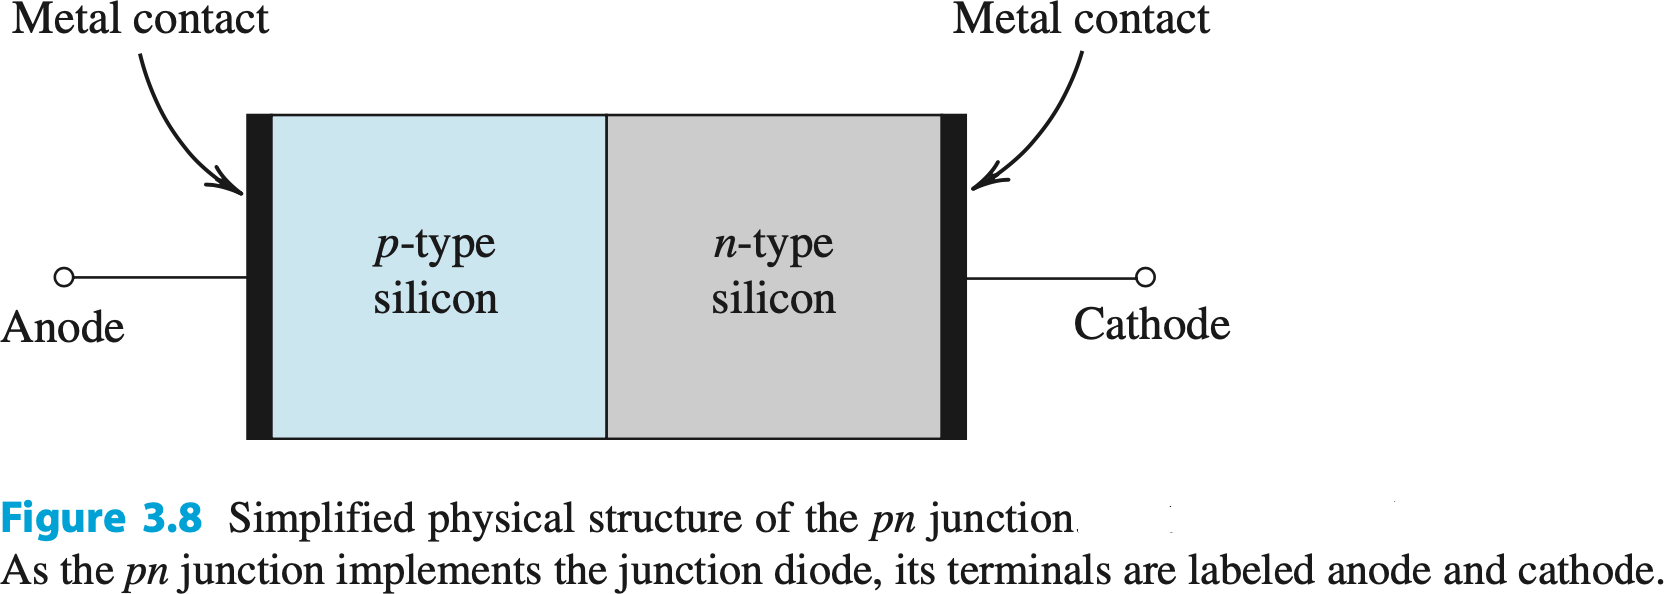

La figura 3.8 muestra una estructura física simplificada de la unión pn. Consiste en un semiconductor de tipo $p$ (por ejemplo, silicio) que se pone en estrecho contacto con un material semiconductor de tipo $n$ (también silicio). En la práctica real, tanto la región p como la n son parte del mismo cristal de silicio; es decir, la unión pn se forma dentro de un único cristal de silicio mediante la creación de regiones de diferentes dopajes (regiones $p$ y $n$).  Como se indica en la figura 3.8, las conexiones de cables externos se realizan a las regiones $p$ y $n$ a través de contactos de metal (aluminio). Si la unión $pn$ se utiliza como diodo, estos constituyen los terminales del diodo y, por lo tanto, están etiquetados como "ánodo" y "cátodo" de acuerdo con la terminología de diodos.

###Operación con terminales de circuito abierto

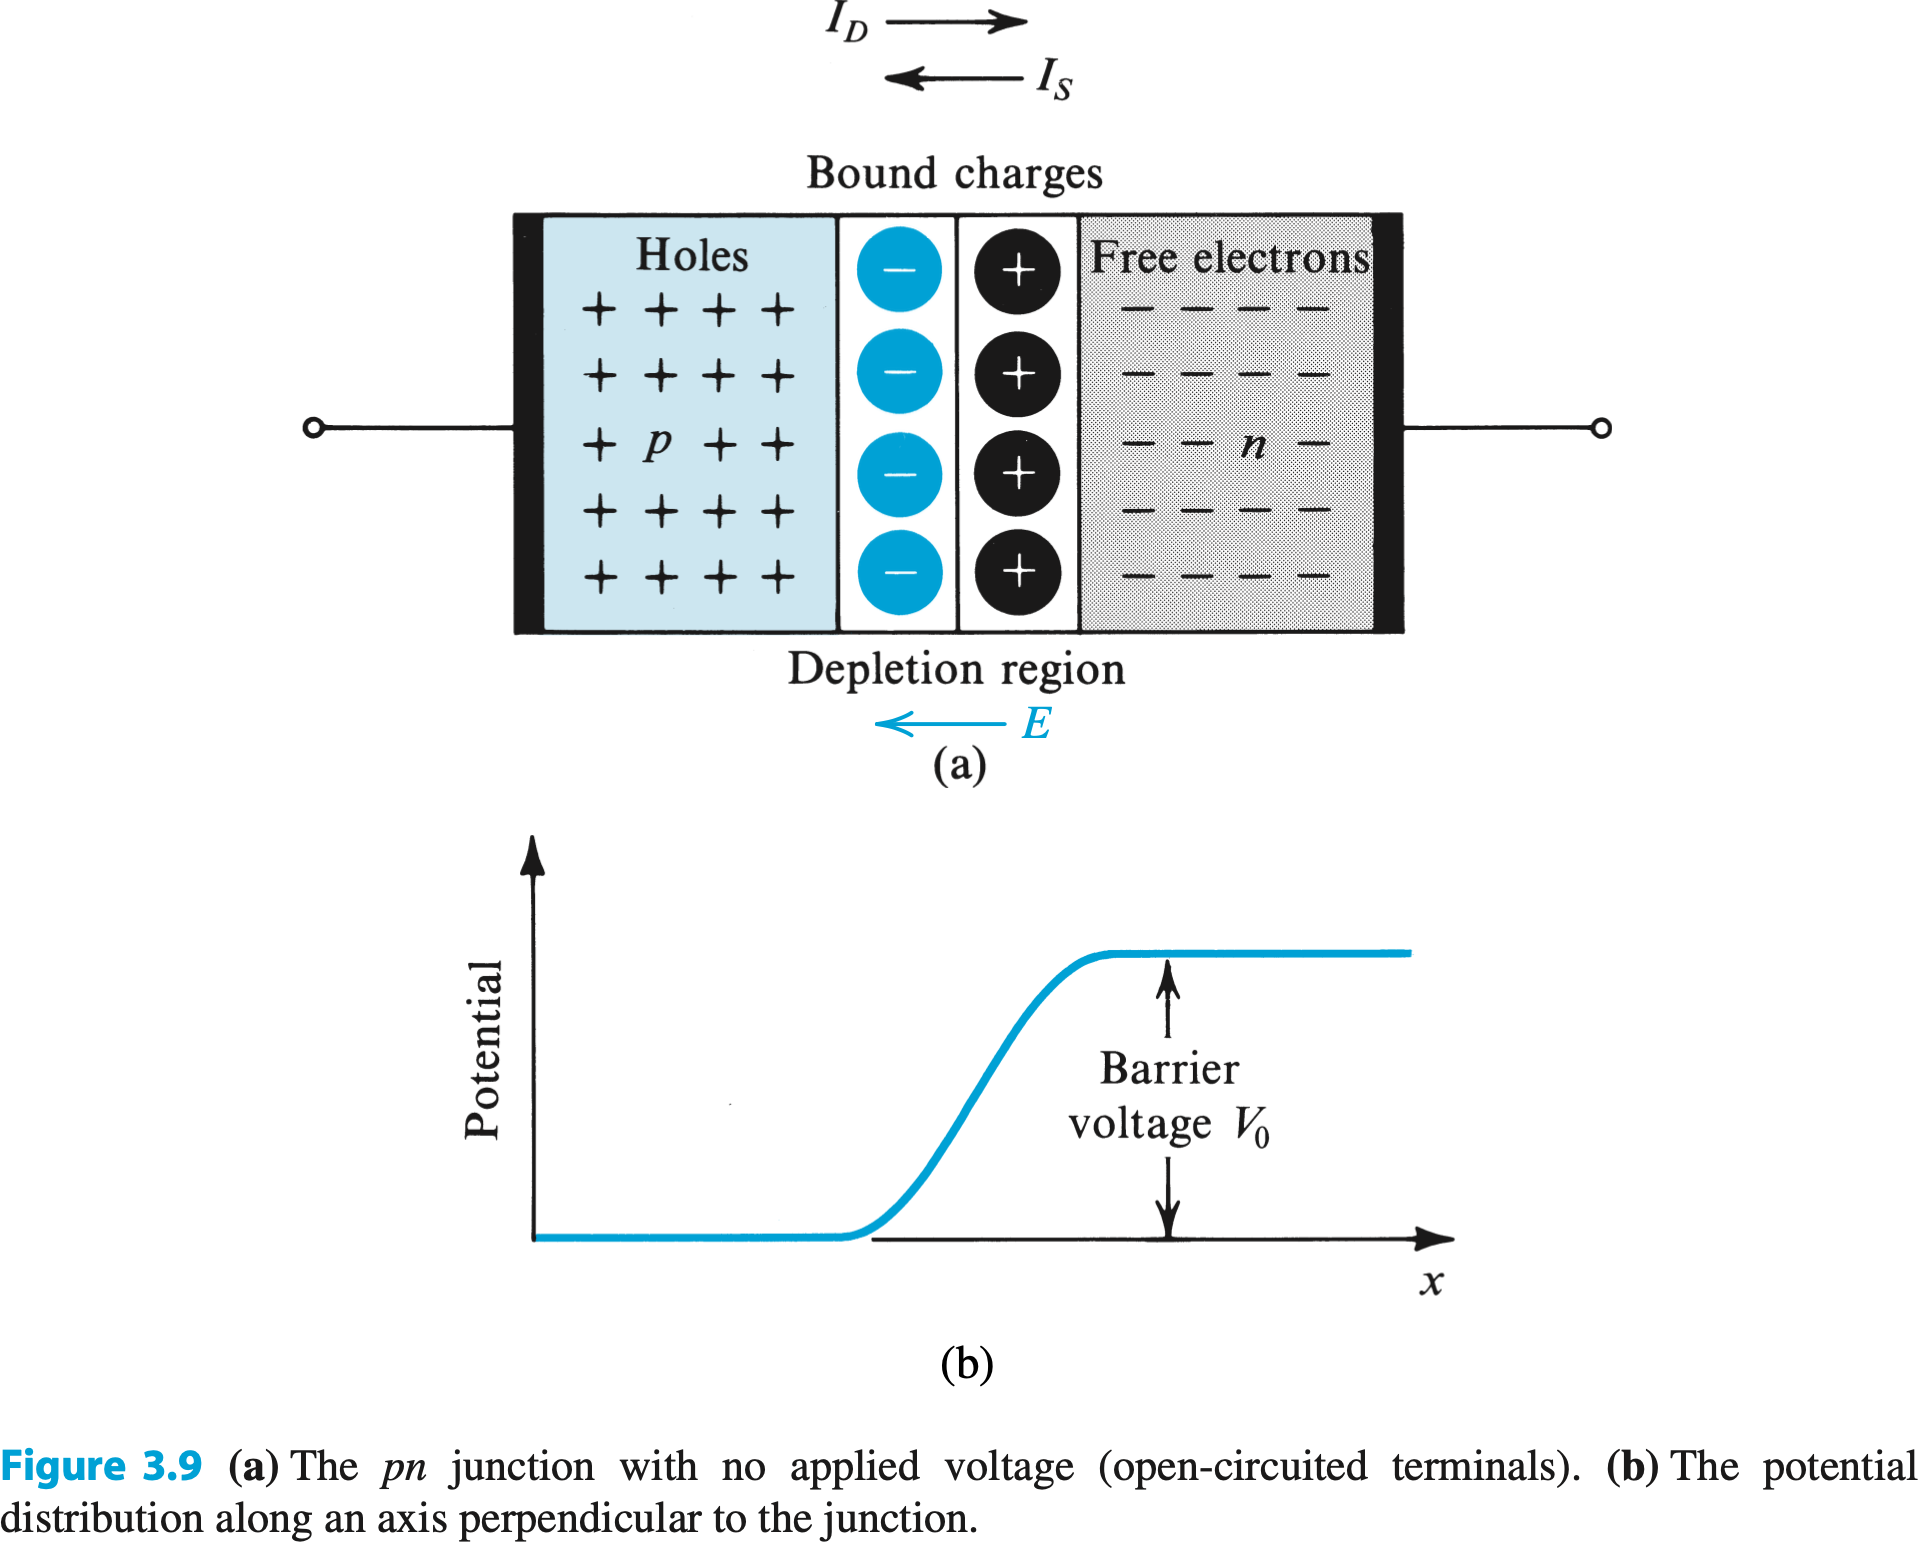

La figura 3.9 muestra una unión $pn$ en condiciones de circuito abierto, es decir, los terminales externos se dejan abiertos. Los signos "$+$" en el material tipo $p$ indican la mayoría de los huecos. La carga de estos huecos es neutralizada por una cantidad igual de carga negativa ligada asociada con los átomos aceptores. Por simplicidad, estas cargas limitadas no se muestran en el diagrama. Tampoco se muestran los electrones minoritarios generados en el material de tipo $p$ por ionización térmica.
En el material de tipo $n$, la mayoría de los electrones se indican mediante signos "$-$". Aquí tampoco se muestra la carga positiva ligada, que neutraliza la carga de la mayoría de los electrones, para mantener el diagrama simple. El material de tipo $n$ también contiene huecos minoritarios generados por ionización térmica, pero no se muestran en el diagrama.

**La corriente de difusión $I_D$**: Debido a que la concentración de huecos es alta en la región $p$ y baja en la región $n$, los huecos se difunden a través de la unión desde el lado $p$ al lado $n$. De manera similar, los electrones se difunden a través de la unión desde el lado $n$ hacia el lado $p$. Estos dos componentes de corriente se suman para formar el $I_D$ de corriente de difusión, cuya dirección es del lado $p$ al lado $n$, como se indica en la figura 3.9.

**La región de agotamiento** Los huecos que se difunden a través de la unión hacia la región $n$ se recombinan rápidamente con algunos de los electrones mayoritarios presentes allí y, por lo tanto, desaparecen de la escena. Este proceso de recombinación también da como resultado la desaparición de algunos electrones libres del material de tipo $n$. Por lo tanto, parte de la carga positiva unida ya no será neutralizada por electrones libres, y se dice que esta carga ha sido descubierta. Dado que la recombinación tiene lugar cerca de la unión, habrá una región cercana a la unión que está agotada de electrones libres y contiene carga positiva ligada descubierta, como se indica en la figura 3.9.
Los electrones que se difunden a través de la unión hacia la región $p$ se recombinan rápidamente con algunos de los agujeros mayoritarios allí y, por lo tanto, desaparecen de la escena. Esto también da como resultado la desaparición de algunos huecos mayoritarios, lo que hace que se descubra parte de la carga negativa ligada (es decir, que ya no se neutralice por los agujeros). Por lo tanto, en el material $p$ cerca de la unión, habrá una región sin agujeros y que contiene una carga negativa ligada descubierta, como se indica en la figura 3.9.
De lo anterior se deduce que existirá una región de agotamiento de portadores en ambos lados de la unión, con el lado $n$ de esta región cargado positivamente y el lado p cargado negativamente. Esta región de agotamiento de portadores o, simplemente, región de agotamiento, también se denomina región de carga espacial. Las cargas en ambos lados de la región de agotamiento hacen que se establezca un campo eléctrico $\vec E$ a través de la región en la dirección indicada en la figura 3.9. Por tanto, se produce una diferencia de potencial a lo largo de la región de agotamiento, con el lado $n$ a un voltaje positivo en relación con el lado $p$, como se muestra en la figura 3.9 (b). Por tanto, el campo eléctrico resultante se opone a la difusión de huecos en la región $n$ y de electrones en la región $p$. De hecho, la caída de voltaje en la región de agotamiento actúa como una barrera que debe superarse para que los huecos se difundan en la región $n$ y los electrones se difundan en la región $p$. Cuanto mayor sea el voltaje de barrera, menor será el número de portadores que podrán superar la barrera y, por lo tanto, menor será la magnitud de la corriente de difusión. Por tanto, es la aparición de la tensión de barrera $V_0$ lo que limita el proceso de difusión de portadores. De ello se deduce que la $I_D$ de la corriente de difusión depende en gran medida de la caída de voltaje $V_0$ en la región de agotamiento.

**La corriente de arrastre $I_{s}$ y el equilibrio** Además del componente de corriente $ I_ {D} $ debido a la difusión del portador mayoritario, existe un componente debido al arrastre del portador minoritario a través de la unión. Específicamente, algunos de los huecos generados térmicamente en el material $ n $ se mueven hacia la unión y alcanzan el borde de la región de agotamiento. Allí, experimentan el campo eléctrico en la región de agotamiento, que los arrastra a través de esa región hacia el lado de $ p $. De manera similar, algunos de los electrones minoritarios generados térmicamente en el material $ p $ se mueven hacia el borde de la región de agotamiento y son barridos por el campo eléctrico en la región de agotamiento a través de esa región hacia el lado de $ n $. Estos dos componentes de corriente -electrones movidos por arrastre de $ p $ a $ n $ y huecos movidos por arrastre de $ n $ a $ p $- se suman para formar la corriente de arrastre $ I_ {S} $, cuya dirección es desde el El lado $ n $ al lado $ p $ de la unión, como se indica en la figura 3.9. Dado que la corriente $ I_ {S} $  es transportada por portadores minoritarios generados térmicamente, su valor depende en gran medida de la temperatura; sin embargo, es independiente del valor del voltaje de la capa de agotamiento $ V_ {0}. $ Esto se debe al hecho de que la corriente de arrastre está determinada por el número de portadores minoritarios que llegan al borde de la región de agotamiento; cualquier operador minoritario que logre llegar al límite de la región de agotamiento será arrastrado por $ E $ independientemente del valor de $ E $ o, en consecuencia, de $ V_ {0} $.

En condiciones de circuito abierto (Fig. 3.9) no existe corriente externa; por lo tanto, las dos corrientes opuestas a través de la unión deben ser iguales en magnitud:
$$
I_{D}=I_{S}
$$
Esta condición de equilibrio  es mantenida por el voltaje de barrera $ V_ {0} $. Por lo tanto, si por alguna razón $ I_{D} $ excede $ I_{S} $, entonces se expondra más carga ligada en ambos lados de la unión, la capa de agotamiento se ensanchará y el voltaje a través de ella $ \left (V_ {0} \right) $ aumentará. Esto, a su vez, hace que $ I_{D} $ disminuya hasta que se logre el equilibrio con $ I_{D} = I_{S}. $ Por otro lado, si $ I_ {S} $ excede $ I_ {D} $, entonces la cantidad de carga expuesta disminuirá, la capa de agotamiento se estrechará y el voltaje a través de ella $ \ left (V_ {0} \ right) $ disminuirá. Esto hace que $ I_ {D} $ aumente hasta que se logre el equilibrio con $ I_ {D} = I_ {S} $.

**El voltaje integrado en la unión** Sin voltaje externo aplicado, se puede mostrar que el voltaje de barrera $ V_ {0} $ a través de la unión $ p n $ viene dado por $ {} ^ {5} $
$$
V_{0} = V_{T} \ln\left(\frac{N_{A} N_{D}}{n_{i}^{2}}\right) \tag{3.22}
$$
donde $ N_ {A} $ y $ N_ {D} $ son las concentraciones de dopaje del lado $ p $ y del lado $ n $ de la unión, respectivamente. Por tanto, $ V_ {0} $ depende tanto de las concentraciones de dopaje como de la temperatura. Se conoce como voltaje integrado de unión. Por lo general, para el silicio a temperatura ambiente, $ V_ {0} $ está en el rango de $ 0.6 \mathrm{~ V} $ a $ 0.9 \mathrm{~ V} $

Cuando los terminales de unión $ p n $ se dejan en circuito abierto, el voltaje medido entre ellos será cero. Es decir, el voltaje $ V_ {0} $ en la región de agotamiento no aparece entre los terminales de unión. Esto se debe a los voltajes de contacto que existen en las uniones metal-semiconductor en los terminales, que contrarrestan y equilibran exactamente el voltaje de barrera. Si este no fuera el caso, habríamos podido extraer energía de la unión $ p n $ aislada, lo que claramente violaría el principio de conservación de la energía.

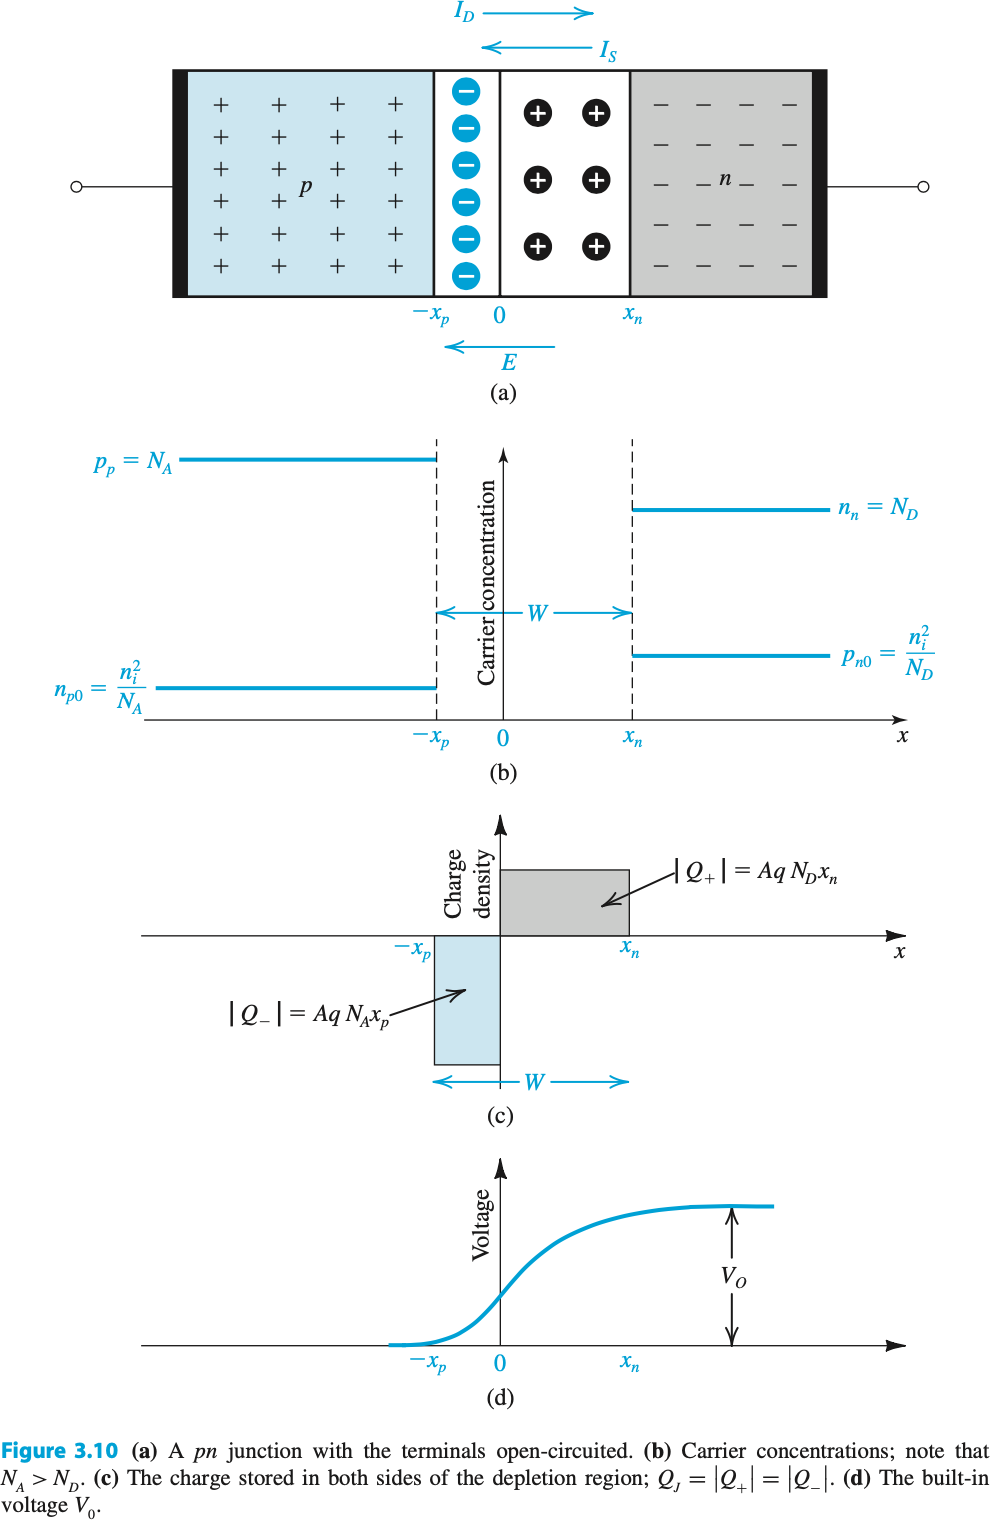

**Ancho de la región de agotamiento y carga almacenada**  La figura 3.10 proporciona una ilustración adicional de la situación que se produce en la unión pn cuando la unión está en equilibrio. En la figura 3.10 (a) mostramos una unión en la que $ N_ {A}> N_ {D} $, una situación típica en la práctica. Esto se ve confirmado por la concentración de portadores en ambos lados de la unión, como se muestra en la figura 3.10 (b). Tenga en cuenta que hemos denotado las concentraciones de portadores minoritarios en ambos lados por $ n_ {p 0} $ y $ p_ {n 0} $, con el subíndice adicional "0" que significa equilibrio (es decir, antes de que se apliquen voltajes externos, al igual que se verá en la siguiente sección). Observe que la región de agotamiento se extiende tanto en los materiales $ p $ como en $ n $ y que existen cantidades iguales de carga en ambos lados $ \left (Q _ {+} \right. $ Y $Q _ {-} $ en la figura 3.10 C). Sin embargo, dado que normalmente se utilizan dopaciones desiguales $ N_ {A} $ y $ N_ {D} $, como en el caso ilustrado en la figura 3.10, el ancho de la capa de agotamiento no será el mismo en los dos lados. Más bien, para descubrir la misma cantidad de carga, la capa de agotamiento se extenderá más profundamente en el material más ligeramente dopado. Específicamente, si denotamos el ancho de la región de agotamiento en el lado $ p $ por $ x_ {p} $ y en el lado $ n $ por $ x_ {n} $, podemos expresar la magnitud del cargo en el $ n $ lado del cruce como
$$
\left | Q _ {+} \right | = q A x_ {n} N_ {D} \tag{3.23}
$$
y eso en el lado $ p $ de la unión como
$$
\left | Q _ {-} \right | = q A x_ {p} N_ {A} \tag{3.23}
$$
donde $ A $ es el área de la sección transversal de la unión en el plano perpendicular a la página. La condición de igualdad de carga ahora se puede escribir como
$$
q A x_ {n} N_ {D} = q A x_ {p} N_ {A} 
$$
que se puede reorganizar para ceder
$$
\frac{x_ {n}}{x_ {p}} = \frac{N_{A}}{N_ {D}} \tag{3.25}
$$
En la práctica real, es habitual que un lado de la unión esté mucho más dopado que el otro, con el resultado de que la región de agotamiento existe casi por completo en un lado (el lado ligeramente dopado).
Se puede demostrar que el ancho $ W $ de la capa de agotamiento viene dado por
$$
W = x_ {n} + x_ {p} = \sqrt{\frac{2\epsilon_{s}}{q}\left(\frac{1} {N_ {A}} + \frac{1} {N_{D}} \right) V_ {0}} \tag{3.26}
$$
donde $ \epsilon_ {s} $ es la permitividad eléctrica del silicio $ = 11.7 \epsilon_{0} = 11.7 \times 8.85 \times 10 ^ {- 14} \mathrm {~ F} /\mathrm {cm} = 1.04 \times $ $ 10 ^ {- 12} \mathrm {~ F} / \mathrm {cm} $. Normalmente, $ W $ está en el rango de $ 0.1 \mu\mathrm{m} $ a $ 1 \mu\mathrm{m} $. las ecuaciones anteriores se pueden utilizar para obtener $ x_ {n} $ y $ x_ {p} $ en términos de $ W $ como
$$
\begin{aligned}
x_{n} &=W \frac{N_{A}}{N_{A}+N_{D}} \\
x_{p} &=W \frac{N_{D}}{N_{A}+N_{D}} 
\end{aligned}
\tag{3.27-28}
$$
El cargo almacenado a ambos lados de la región de agotamiento se puede expresar en términos de $ W $ utilizando las ecuaciones anteriores para obtener
$$
\begin{aligned}
&Q_{J}=\left|Q_{+}\right|=\left|Q_{-}\right| \\
&Q_{J}=A q\left(\frac{N_{A} N_{D}}{N_{A}+N_{D}}\right) W 
\end{aligned}
\tag{3.29}
$$
Finalmente, podemos sustituir $ W $ de la una ecuación anterior para obtener
$$
Q_{J}=A \sqrt{2 \epsilon_{s} q\left(\frac{N_{A} N_{D}}{N_{A}+N_{D}}\right) V_{0}} \tag{3.30}
$$
Estas expresiones para $ Q_ {J} $ resultarán útiles en las secciones siguientes.

####Ejemplo

Considere una unión $ pn $ en equilibrio a temperatura ambiente $ (T = 300 \mathrm {~ K}) $ para la cual las concentraciones de dopaje son $ N_{A} = 10^{18} /\mathrm{cm}^{3 } $ y $N_{D} =10^{16} /\mathrm{cm}^{3}$ y el área de la sección transversal $A = 10^{-4}\mathrm{~ cm}^{2}$ Calcule $ p_{p}, n_{p 0}, n_{n}, p_{n 0}, V_{0}, W, x_{n}, x_{p} $ y $ Q_{J}. $ Use $ n_{i} = 1.5 \times 10^{10} / \mathrm{cm}^{3}$

#####Solución

In [ ]:
import math
#Variable Declaration

T=300.              # Kelvin
N_A = 10**18        # cm^-3
N_D = 10**16        # cm^-3
A = 10**-4.         # cm^2
n_i = 1.5*10**10    # For Si
p_p = N_A           # approx
n_p0 = n_i**2/p_p   # 
print('n_p0= {:.2E} cm^-3'.format(n_p0))
n_n=N_D             # approx
p_n0 = n_i**2/n_n
print('p_n0= {:.2E} cm^-3'.format(p_n0))
k_B = 8.62*10**-5   # Boltzman constant in eV/Kelvin
V_T = k_B*T         # q canceled to convert from eV to V
print('V_T= {:.2E} V'.format(V_T))
V = V_T*math.log(N_A*N_D/n_i**2)
print('V= {:.2E} V'.format(V))
epsilon_0 = 8.85 *10**-14 
epsilon_s = 11.7*epsilon_0
q = 1.6*10**-19.    # Electron's charge in Coulomb
W = math.sqrt((2.0*V*epsilon_s/q)*(1.0/N_A +1.0/N_D))
print('The width of the depletion zone, W= {:.2E} μm'.format(W/10**-5))
x_n = W*N_A/(N_A+N_D)
x_p = W*N_D/(N_A+N_D)
print('The width of the depletion region in the n side , x_n= {:.2E} μm'.format(x_n/10**-5))
print('The width of the depletion region in the p side , x_p= {:.2E} μm'.format(x_p/10**-5))
q = 1.6*10**-19.    # Electron's charge in Coulomb
Q_J = A*q*N_A*N_D*W/(N_A+N_D)
print('Stored charge on either side of the depletion region , Q_J= {:.2E} pC'.format(Q_J/10**-12))

###Operación con voltaje aplicado

Si el voltaje se aplica de modo que el lado $p$ se haga más positivo que el lado $n$, se denomina voltaje de polarización directa. Por el contrario, si nuestro voltaje dc aplicado es tal que hace que el lado $n$ sea más positivo que el lado $p$, se dice que es un voltaje de polarización inversa. Como se verá, la unión $pn$ exhibe propiedades de conducción muy diferentes en la direccion de polarización de la juntura  y la dirección opuesta.

####Descripción cualitativa

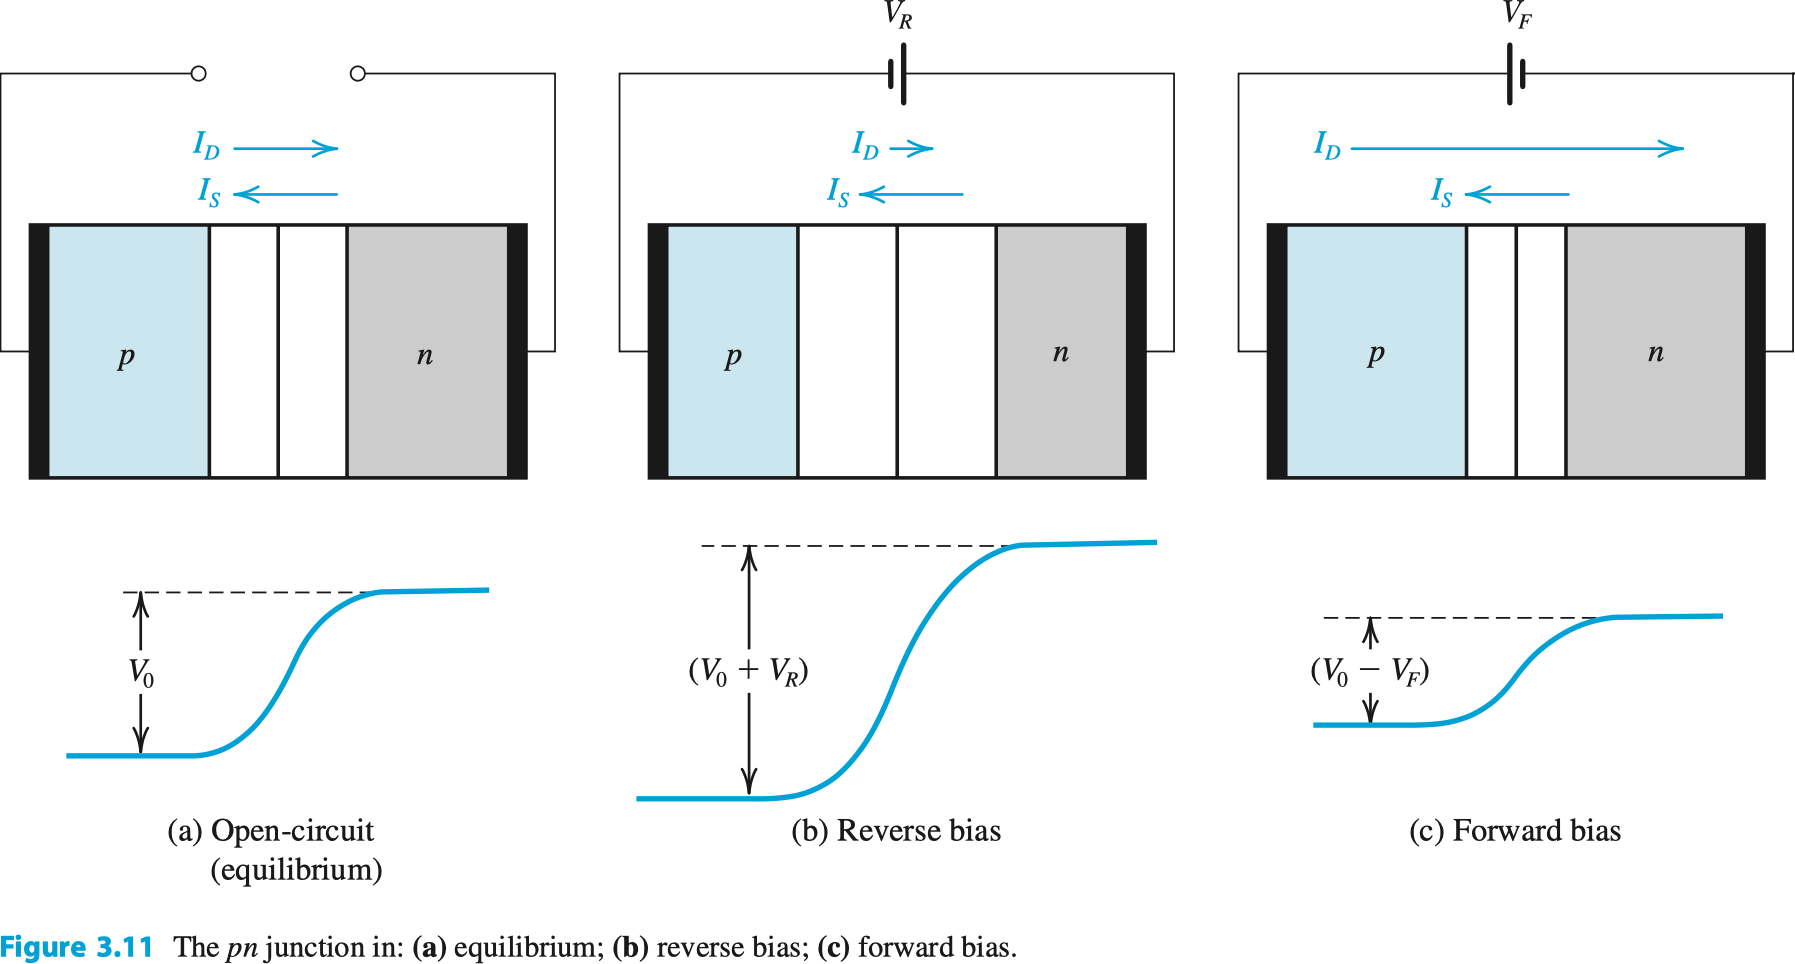

  La figura 3.11 muestra la unión pn bajo tres condiciones diferentes: (a) la condición de circuito abierto o de equilibrio estudiada en la sección anterior; (b) la condición de polarización inversa, donde se aplica un voltaje de $dc$; y (c) la condición de polarización directa, donde se aplica un voltaje de $dc$. Observe que en el caso de circuito abierto, se desarrolla un voltaje de barrera $V_0$, lo que hace que $n$ sea más positivo que $p$, y limita la corriente de difusión $I_D$ a un valor exactamente igual a la corriente de arrastre $I_S$, lo que da como resultado una corriente cero en los terminales de unión. como debería ser el caso ya que los terminales están en circuito abierto. Además, como se mencionó anteriormente, el voltaje de barrera $V_0$, aunque establece el equilibrio de corriente a través de la unión, de hecho no aparece entre los terminales de la unión.
Considere ahora el caso de sesgo inverso en (b). El voltaje de polarización inversa aplicado externamente VR está en la dirección de agregar al voltaje de barrera, y lo hace, aumentando así el voltaje de barrera efectivo a $(V_0 + V_R)$ como se muestra. Esto reduce el número de huecos que se difunden en la región n y el número de electrones que se difunden en la región $p$. El resultado final es que el $I_D$ de la corriente de difusión se reduce drásticamente. Como se verá en breve, un voltaje de polarización inversa de aproximadamente un voltio es suficiente para causar $I_D \approx 0$, y la corriente a través de la unión y a través del circuito externo será igual a $I_S$. Recordando que $ I_S $ es la corriente debido a la arrastre a través de la región de agotamiento de los portadores minoritarios generados térmicamente, esperamos que $ I_S $ sea muy pequeño y dependa en gran medida de la temperatura. Mostraremos que este es el caso muy pronto. Por tanto, concluimos que en la dirección inversa, la unión pn conduce una corriente muy pequeña y casi constante igual a $ I_S $.

Antes de dejar el caso de polarización inversa, observe que el aumento en el voltaje de barrera estará acompañado por un aumento correspondiente en la carga descubierta almacenada en ambos lados de la región de agotamiento. Esto a su vez significa una región de agotamiento más amplia, necesaria para descubrir la carga adicional requerida para soportar el voltaje de barrera más grande $ \left(V_{0} + V_{R} \right) $. Analíticamente, estos resultados pueden obtenerse fácilmente mediante una simple extensión de los resultados del caso de equilibrio. Por lo tanto, el ancho de la región de agotamiento se puede obtener reemplazando $ V_{0} $,
$$
W = x_{n} + x_ {p} = \sqrt{\frac{2 \epsilon_{s}}{q} \left(\frac{1}{N_{A}} + \frac{1}{N_{D}}\right) \left(V_{0} + V_ {R} \right)} \tag{3.31}
$$
y la magnitud de la carga almacenada a cada lado de la región de agotamiento se puede determinar reemplazando $ V_{0} $  por $ \left(V_ {0} + V_ {R} \right) $,
$$
Q_{J} = A \sqrt{2 \epsilon_{s} q \left(\frac {N_{A} N_{D}} {N_{A} + N_{D}} \right) \left(V_{ 0} + V_{R} \right)} \tag{3.32}
$$
A continuación, consideramos el caso de polarización directa que se muestra en la figura 3.11 (c). Aquí, el voltaje aplicado $ V_{F} $ está en la dirección que se resta del voltaje incorporado $ V_{0} $, lo que resulta en un voltaje de barrera reducido $ \left(V_{0} -V_{F} \right) $ en toda la región de agotamiento. Este voltaje de barrera reducido irá acompañado de una carga de región de agotamiento reducida y un ancho de región de agotamiento correspondientemente más estrecho $ W $. Lo más importante es que la disminución del voltaje de barrera permitirá que se difundan más huecos de $ p $ a $ n $ y que más electrones se difundan de $ n $ a $ p. $ Por lo tanto, la corriente de difusión $ I_{D}$ aumenta sustancialmente y , como se verá en breve, puede llegar a ser muchos órdenes de magnitud mayor que la corriente de arrastre $ I_{S} $. La corriente $I $ en el circuito externo es, por supuesto, la diferencia entre $ I_{D} $ y $ I_{S} $,
$$
I = I_ {D} -I_ {S}
$$
y fluye en la dirección de avance de la unión, de $ p $ a $ n. $ Por lo tanto, concluimos que la unión $ pn $ puede conducir una corriente sustancial en la región de polarización directa y que la corriente es principalmente una corriente de difusión cuyo valor está determinada por el voltaje de polarización directa $ V_ {F} $.

####La relación corriente-voltaje de la juntura

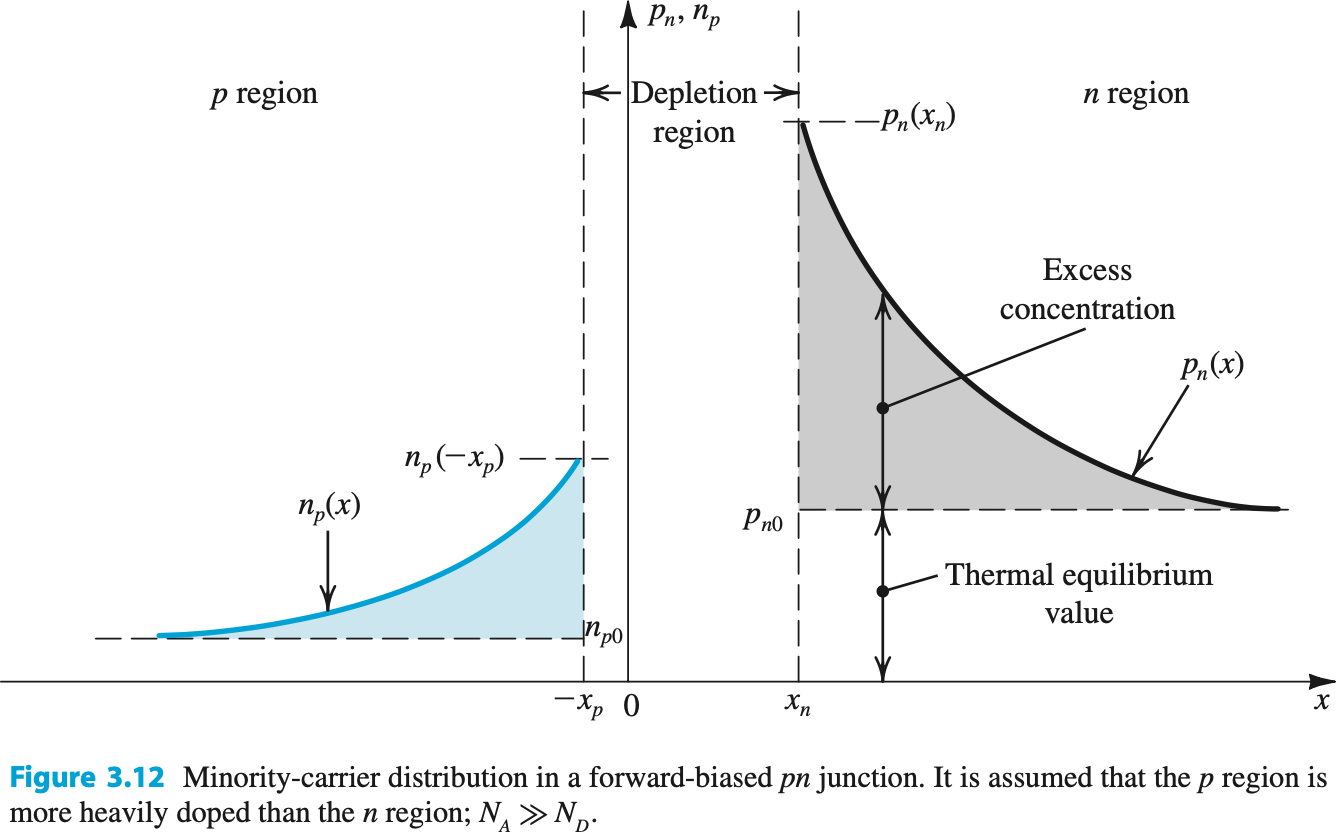

Aquí vamos a encontrar una expresión analítica que describa la relación corriente-voltaje de la unión $ p n $. A continuación, consideramos una unión que opera con un voltaje aplicado en la direccion del la polarización de la juntura $ V $ y derivamos una expresión para la corriente $ I $ que fluye en la dirección de polarización de la juntura (de $ p $ a $ n $). Sin embargo, nuestra derivación es general y se verá que produce la corriente inversa cuando el voltaje aplicado $ V $ se vuelve negativo.

De la descripción cualitativa anterior sabemos que un voltaje de polarización directa $ V $ se resta del voltaje incorporado $ V_ {0} $, lo que resulta en un voltaje de barrera más bajo $ \left(V_ {0} -V \right)$, como consecueencia la barrera baja, y a su vez, hace posible que un mayor número de huecos supere la barrera y se difunda en la región de $ n $. Se puede hacer una afirmación similar acerca de los electrones de la región $ n $ que se difunden en la región $ p $.

Consideremos ahora los huecos inyectados en la región $ n $. La concentración de huecos en la región $ n $ en el borde de la región de agotamiento aumentará considerablemente. De hecho, un resultado importante de la física del dispositivo muestra que la concentración en estado estable en el borde de la región de agotamiento será
$$
p_ {n} \left(x_ {n} \right) = p_{n 0} e ^ {V N_{T}} \tag{3.33}
$$
Es decir, la concentración de los huecos minoritarios aumenta desde el valor de equilibrio de $ p_{n 0} $ (véase la figura 3.10) al valor mucho mayor determinado por el valor de $ V $, dado por la ecuación. (3,33).
Describimos esta situación de la siguiente manera: El voltaje de polarización directa $ V $ da como resultado una concentración excesiva de huecos minoritarios en $ x = x_{n} $, dado por
$$
\begin{aligned}
\text{Exceso de concentración} & = p_{n 0} e^{V N_{T}} - p_{n 0} \\
& = p_{n 0} \left(e^{V N_{T}} - 1 \right)
\end{aligned}
 \tag{3.34}
$$
El aumento de la concentración de portadores minoritarios en las Ecs. (3.33) y (3.34) ocurren en el borde de la región de agotamiento $ \left(x = x_ {n} \right) $. A medida que los huecos inyectados se difunden en el material $ n $, algunos se recombinarán con la mayoría de los electrones y desaparecerán. Por lo tanto, el exceso de concentración de orificios disminuirá exponencialmente con la distancia. Como resultado, la concentración total de huecos en el material $ n $ vendrá dada por
$$
p_{n} (x) = p_{n 0} + (\text{Exceso de concentración}) e^{- \left(x-x_ {n} \right)/ L_{p}}
$$
Sustituyendo el "exceso de concentración" en la eecuacion anterior obtenemos,
$$
p_{n} (x) = p_{n 0} + p_{n 0} \left (e^{VN_{T}} - 1 \right) e^{- \left (x-x_ {n} \right) / L_{p}} \tag{3.35}
$$
La caída exponencial se caracteriza por la constante $ L_ {p} $, que se denomina longitud de difusión de los huecos en el material $ n $. Cuanto menor sea el valor de $ L_ {p} $, más rápido se recombinarán los huecos inyectados con los electrones mayoritarios, lo que dará como resultado una disminución más pronunciada de la concentración de portadores minoritarios.
La figura $ 3.12 $ muestra los perfiles de concentración de portadores minoritarios en estado estacionario a ambos lados de una unión $ p n $ en la que $ N_{A} \gg N_{D} $. Quedémonos un poco más con la difusión de huecos en la región de $ n $. Tenga en cuenta que la región sombreada debajo de la exponencial representa el exceso de portadores minoritarios (huecos). Por nuestro estudio de difusión en la sección $ 3.3 $, sabemos que el establecimiento de un perfil de concentración de portadores como el de la figura $ 3.12 $ es esencial para sustentar una corriente de difusión en estado estacionario. De hecho, ahora podemos encontrar el valor de la densidad de corriente de difusión de huecos utilizando los resultados anteriores
$$
J_{p} (x) = - q D_{p} \frac{d p_{n} (x)} {d x}
$$
Sustituyendo $ p_ {n} (x) $ de una de las ecuaciones anteriores obtenemos:
$$
J_{p} (x) = q \left (\frac{D_{p}} {L_{p}} \right) p_{n 0} \left (e^{V N_{T}} - 1 \right) e^{- \left(x-x_ {n} \right) / L_{p}}  \tag{3.36}
$$
Como se esperaba, $ J_{p} (x) $ es el más alto en $ x = x_{n} $
$$
J_{p} \left(x_ {n} \right) = q \left(\frac{D_{p}} {L_{p}} \right) p_{n 0} \left(e^{V N_{ T}} - 1 \right)  \tag{3.37}
$$
y decae exponencialmente para $ x> x_ {n} $, cuando los huecos minoritarios se recombinan con los electrones mayoritarios. Esta recombinación, sin embargo, significa que la mayoría de los electrones tendrán que reponerse con una corriente que inyecte electrones del circuito externo en la región $ n $ de la unión. Este último componente de corriente tiene la misma dirección que la corriente del hueco (porque los electrones que se mueven de derecha a izquierda dan lugar a la corriente en la dirección de izquierda a derecha). De ello se deduce que a medida que $ J_ {p} (x) $ disminuye, el componente de corriente del electrón aumenta exactamente en la misma cantidad, haciendo que la corriente total en el material $ n $ sea constante al valor dado por la ecuación. (3.37).

Se puede aplicar un desarrollo exactamente paralelo a los electrones que se inyectan desde la región $ n $ a la región $ p $, lo que da como resultado una corriente de difusión de electrones dada por 
$$
J_{n} \left(-x_{p} \right) = q \left(\frac{D_ {n}}{L_ {n}} \right) n_{p 0} \left(e^{V N_ {T}} - 1 \right)  \tag{3.38}
$$
Ahora, aunque las corrientes en las Ecs. (3.37) y (3.38) se encuentran en los dos bordes de la región de agotamiento, sus valores no cambian en la región de agotamiento. Por lo tanto, podemos eliminar los descriptores de ubicación $ \left (x_ {n} \right), \left(-x_ {p} \right) $, sumar las dos densidades de corriente y multiplicar por el área de unión $ A $ para obtener la corriente total $ I $ como
$$
\begin {aligned}
& I = A \left(J_ {p} + J_ {n} \right) \\
& I = A q \left(\frac {D_ {p}} {L_ {p}} p_ {n 0} + \frac{D_ {n}} {L_ {n}} n_ {p 0} \right) \left (e ^ {V N_ {T}} - 1 \right)
\end {aligned}
$$
Sustituyendo por $ p_ {n 0} = n_ {i} ^ {2} / N_ {D} $ y por $ n_ {p 0} = n_ {i} ^ {2} / N_ {A} $ da
$$
I = A q n_ {i} ^ {2} \left(\frac{D_ {p}} {L_ {p} N_ {D}} + \frac{D_ {n}} {L_ {n} N_ {A }} \right) \left (e ^ {V N_ {T}} - 1 \right) \tag{3.39}
$$
A partir de esta ecuación, observamos que para un $ V $ negativo (sesgo inverso) con una magnitud de unas pocas veces $ V_ {T} (25.9 \mathrm {mV}) $, el término exponencial se vuelve esencialmente cero y la corriente a través del la unión se vuelve negativa y constante. De nuestra descripción cualitativa en la Sección 3.5.1, sabemos que esta corriente debe ser $ I_{S}. $ Por lo tanto,
$$
I = I_ {S} \left(e ^ {V N_ {T}} - 1 \right)  \tag{3.40}
$$
dónde
$$
I_ {S} = A q n_ {i} ^ {2} \left(\frac{D_ {p}} {L_ {p} N_ {D}} + \frac {D_ {n}} {L_ {n} N_ {A}} \right)  \tag{3.41}
$$
La figura $ 3.13 $ muestra la característica $ I-V $ de la unión $ p n $. Observe que en la dirección inversa la corriente se satura a un valor igual a $ -I_ {S} $. Por esta razón, $ I_ {S} $ recibe el nombre de corriente de saturación. De la ecuación. (3.41) vemos que $ I_ {S} $ es directamente proporcional al área de la sección transversal $ A $ de la unión. Por lo tanto, otro nombre para $ I_ {S} $, uno que preferimos usar en este libro, es la corriente de escala de unión. Los valores típicos de $ I_ {S} $, para uniones de varias áreas, oscilan entre $ 10 ^ {- 18} \mathrm{~ A} $ y $ 10 ^ {- 12} \mathrm {~ A} $.

Además de ser proporcional al área de unión $ A $, la expresión para $ I_ {S} $ en la ecuación. (3.41) indica que $ I_ {S} $ es proporcional a $ n_ {i} ^ {2} $, que es una función muy fuerte de la temperatura.

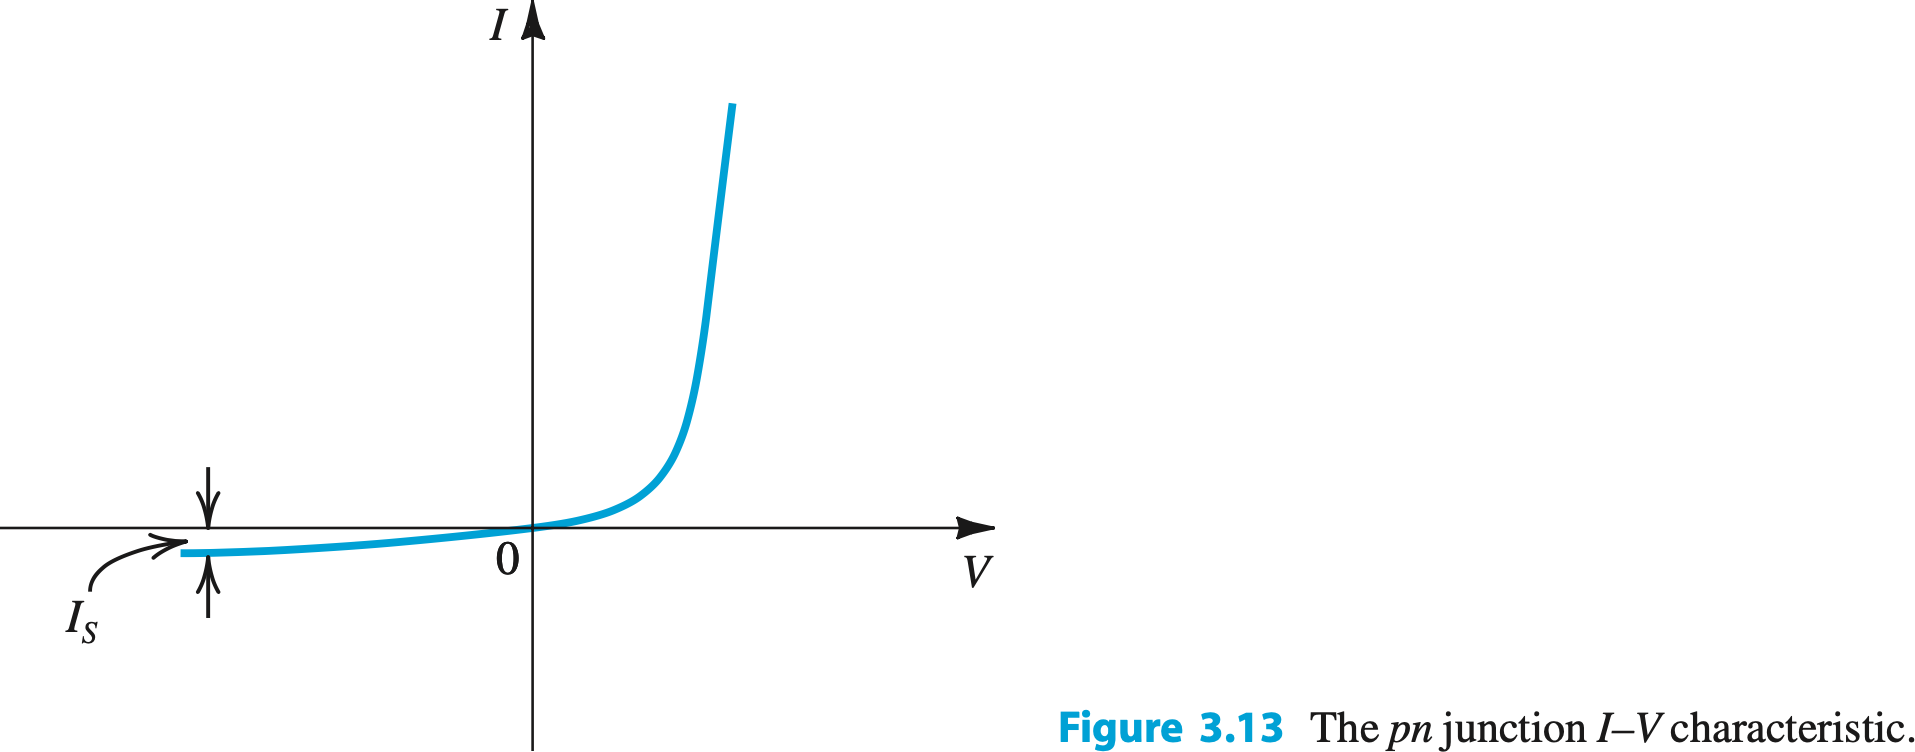

#####Ejemplo

Para la unión $ pn $ considerada en un Ejemplo anterior para la cual $ N_ {A} = 10 ^ {18} / \mathrm {cm} ^ {3}, N_ {D} = 10 ^ {16} / \mathrm {cm } ^ {3}, A = 10 ^ {- 4} \mathrm {~ cm} ^ {2} $ y $ n_ {i} = 1.5 \times 10 ^ {10} / \mathrm {cm} ^ {3 } $, sea $ L_ {p} = 5 \mu \mathrm {m}, L_ {n} = 10 \mu \mathrm {m}, D_ {p} $ (en la región $ n $ $) = 10 \mathrm {~ cm} ^ {2} / \mathrm {V} \cdot \mathrm {s} $, y $ D_ {n} $ (en la región $ p $ $) = 18 \mathrm {~ cm} ^ { 2} / \mathrm {V} \cdot $ s. La unión $ p n $ tiene polarización directa y conduce una corriente $ I = 0.1 \mathrm{~ mA} $. Calcule: (a) $ I_{S}; $ (b) el voltaje de polarización directa $ V $; y (c) el componente de la corriente $ I $ debido a la inyección de huecos y el componente de corriente debido a la inyección de electrones a través de la unión.

######Solución

(a) Usando la ecuación. (3.41), encontramos $ I_ {S} $ como
$$
\begin{aligned}
I_{S}=& 10^{-4} \times 1.6 \times 10^{-19} \times\left(1.5 \times 10^{10}\right)^{2} \\
& \times\left(\frac{10}{5 \times 10^{-4} \times 10^{16}}+\frac{18}{10 \times 10^{-4} \times 10^{18}}\right) \\
=& 7.3 \times 10^{-15} \mathrm{~A}
\end{aligned}
$$
(b) En la dirección de avance,
$$
\begin{aligned}
I &=I_{S}\left(e^{V N_{T}}-1\right) \\
& \simeq I_{S} e^{V N_{T}}
\end{aligned}
$$
Por lo tanto,
$$
V=V_{T} \ln \left(\frac{I}{I_{S}}\right)
$$
Por $ I = 0.1 \mathrm{~ mA} $
$$
\begin{aligned}
V &=25.9 \times 10^{-3} \ln \left(\frac{0.1 \times 10^{-3}}{7.3 \times 10^{-15}}\right) \\
&=0.605 \mathrm{~V}
\end{aligned}
$$
(c) El componente de inyección de pozo de $ I $ se puede encontrar usando la ecuación. (3,37)
$$
\begin{aligned}
I_{p} &=A q \frac{D_{p}}{L_{p}} p_{n 0}\left(e^{V N_{T}}-1\right) \\
&=A q \frac{D_{p}}{L_{p}} \frac{n_{i}^{2}}{N_{D}}\left(e^{V N_{T}}-1\right)
\end{aligned}
$$
De manera similar, $ I_ {n} $ se puede encontrar usando Eq. (3,39),
$$
I_{n}=A q \frac{D_{n}}{L_{n}} \frac{n_{i}^{2}}{N_{A}}\left(e^{V N_{T}}-1\right)
$$
Por lo tanto,
$$
\frac{I_{p}}{I_{n}}=\left(\frac{D_{p}}{D_{n}}\right)\left(\frac{L_{n}}{L_{p}}\right)\left(\frac{N_{A}}{N_{D}}\right)
$$
Para este caso,
$$
\frac{I_{p}}{I_{n}}=\frac{10}{18} \times \frac{10}{5} \times \frac{10^{18}}{10^{16}}=1.11 \times 10^{2}=111
$$

####Ruptura inversa

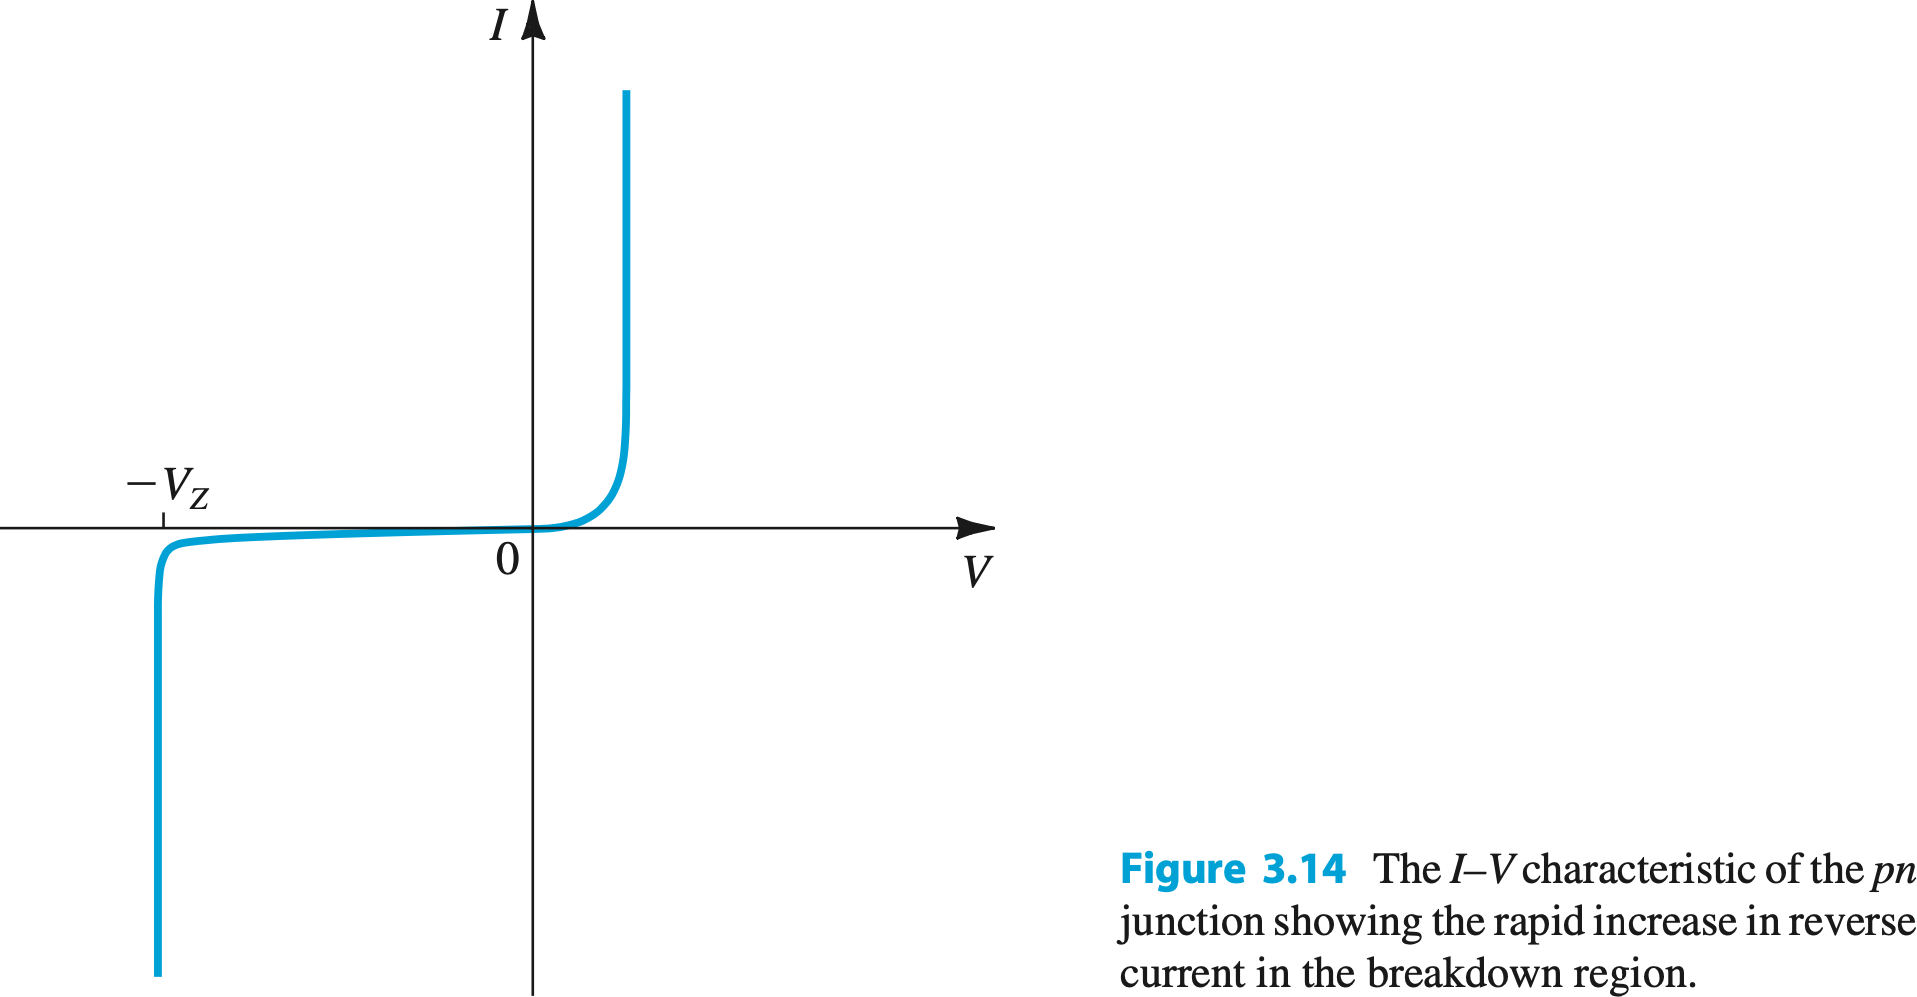

La descripción del funcionamiento de la unión pn en la dirección inversa y la relación $ I-V $ de la unión en la ecuación. (3.40), indican que a un voltaje de polarización inversa $ -V $, con $ V \gg V_ {T} $, la corriente inversa que fluye a través de la unión es aproximadamente igual a $ I_ {S} $ y por lo tanto es muy pequeña. Sin embargo, a medida que aumenta la magnitud del voltaje de polarización inversa $ V $, se alcanza un valor en el que fluye una corriente inversa muy grande, como se muestra en la figura 3.14. Observe que cuando $ V $ alcanza el valor $ V_ {Z} $, el aumento dramático en la corriente inversa está acompañado por un aumento muy pequeño en el voltaje inverso; es decir, el voltaje inverso a través de la unión

permanece muy cerca del valor $V_Z$. El fenómeno que ocurre en $V = V_Z$ se conoce como ruptura de la unión. No es un fenómeno destructivo. Es decir, la unión pn se puede operar repetidamente en la región de ruptura sin un efecto permanente sobre sus características. Sin embargo, esto se basa en el supuesto de que la magnitud de la corriente de ruptura inversa está limitada por el circuito externo a un valor "seguro". El valor "seguro" es aquel que da como resultado la limitación de la potencia disipada en la unión a un nivel seguro y permisible.
Hay dos posibles mecanismos para la ruptura de la unión pn: el efecto Zener y el efecto avalancha. Si una unión pn se rompe con un voltaje de ruptura $V_Z < 5V$, el mecanismo de ruptura suele ser el efecto zener. La ruptura por avalancha ocurre cuando VZ es mayor que aproximadamente $7 V$. Para las uniones que se descomponen entre $5 V$ y $7 V$, el mecanismo de ruptura puede ser el efecto zener o avalancha o una combinación de los dos.
La ruptura de Zener ocurre cuando el campo eléctrico en la capa de agotamiento aumenta hasta el punto de romper los enlaces covalentes y generar pares de electrones y huecos. Los electrones generados de esta manera serán arrastrados por el campo eléctrico hacia el lado n y los huecos hacia el lado p. Por tanto, estos electrones y huecos constituyen una corriente inversa a través de la unión. Una vez que comienza el efecto Zener, se puede generar una gran cantidad de portadoras, con un aumento insignificante en el voltaje de unión. Por lo tanto, la corriente inversa en la región de ruptura será grande y su valor debe ser determinado por el circuito externo, mientras que la tensión inversa que aparece entre los terminales del diodo permanecerá cerca de la tensión de ruptura especificada $V_Z$.
El otro mecanismo de ruptura, ruptura de avalancha, ocurre cuando los portadores minoritarios que cruzan la región de agotamiento bajo la influencia del campo eléctrico obtienen suficiente energía cinética para poder romper los enlaces covalentes en los átomos con los que chocan. Los portadores liberados por este proceso pueden tener una energía suficientemente alta para poder hacer que otros portadores sean liberados en otra colisión ionizante. Este proceso sigue repitiéndose a la manera de una avalancha, con el resultado de que se crean muchos transportistas que pueden soportar cualquier valor de corriente inversa, según lo determinado por el circuito externo, con un cambio insignificante en la caída de voltaje a través de la unión.

####Capacitancia en la juntura

Hay dos mecanismos de almacenamiento de carga en la unión $pn$. Uno está asociado con la carga almacenada en la región de agotamiento, y el otro está asociado con la carga portadora minoritaria almacenada en los materiales $n$ y $p$ como resultado de los perfiles de concentración establecidos por la inyección del portador. Mientras que la primera es más fácil de ver cuando la unión pn tiene polarización inversa, la segunda está en efecto solo cuando la unión está polarizada hacia adelante.

#####Capacitancia de agotamiento o de juntura

Cuando una unión $ p n $ tiene polarización inversa con un voltaje $ V_ {R} $, la carga almacenada a ambos lados de la región de agotamiento viene dada por la ecuación. (3.32),
$$
Q_ {J} = A \sqrt {2 \epsilon_ {s} q \frac {N_ {A} N_ {D}} {N_ {A} + N_ {D}} \left (V_ {0} + V_ {R }\right)}
$$
Por lo tanto, para una unión $ p n $ dada,
$$
Q_ {J} = \alpha \sqrt{V_ {0} + V_ {R}} \tag{3.42}
$$
donde $ \alpha $ viene dado por
$$
\alpha = A \sqrt {2 \epsilon_{s} q \frac{N_ {A} N_ {D}} {N_ {A} + N_ {D}}} \tag{3.43}
$$

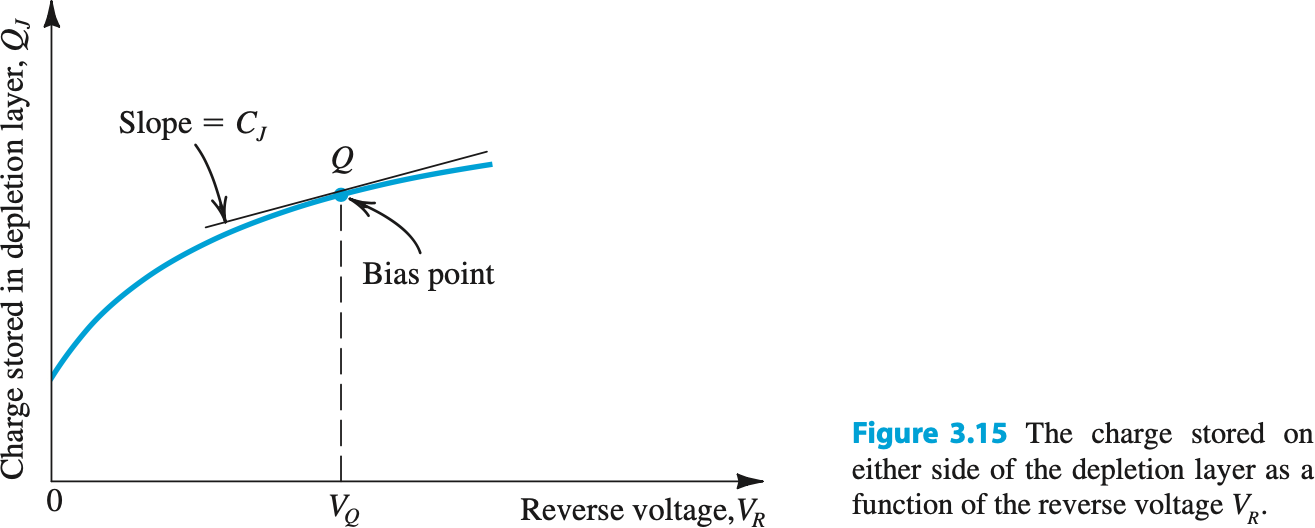

Por tanto, $ Q_ {J} $ no está relacionado de forma lineal con $ V_ {R} $, como se muestra en la figura 3.15. Esta relación no lineal hace que sea difícil definir una capacitancia que tenga en cuenta la necesidad de cambiar $ Q_ {J} $ siempre que $ V_ {R} $ halla cambiado. Sin embargo, podemos suponer que la unión está operando en un punto como $ Q $, como se indica en la figura 3.15, y definir una capacitancia $ C_{j} $ que relacione el cambio en la carga $ Q_{J} $ a un cambio en el voltaje $ V_ {R} $,
$$
C_ {j} = \left. \frac {d Q_ {J}} {d V_ {R}} \right | _ {V_ {R} = V_ {Q}}\tag{3.44}
$$
Este enfoque de capacitancia incremental resulta bastante útil en el diseño de circuitos electrónicos, como veremos a lo largo de este libro.
Usando la ecuación. (3.44) junto con la Ec. (3.42) rendimientos
$$
C_ {j} = \frac{\alpha} {2 \sqrt{V_ {0} + V_ {R}}} \tag{3.45}
$$
El valor de $ C_ {j} $ con un sesgo inverso cero se puede obtener de la ecuación. (3,45) como
$$
C_ {j 0} = \frac{\alpha} {2 \sqrt{V_ {0}}} \tag{3.46}
$$
lo que nos permite expresar $ C_ {j} $ como
$$
C_ {j} = \frac{C_ {j 0}} {\sqrt {1+ \frac{V_ {R}} {V_ {0}}}} \tag{3.47}
$$
donde $ C_ {j 0} $ viene dado por Eq. (3.46) o alternativamente si sustituimos $ \alpha $ de la Ec. (3.43) por
$$
C_ {j 0} = A \sqrt{\left (\frac {\epsilon_{s} q} {2} \right) \left (\frac {N_ {A} N_ {D}} {N_ {A} + N_ {D}} \right) \left(\frac {1} {V_ {0}} \right)} \tag{3.48}
$$
Antes de dejar el tema de la región de agotamiento o capacitancia de unión, señalamos que en la unión $ p n $ que hemos estado estudiando, se hace que la concentración de dopaje cambie abruptamente en el límite de la unión. Tal cruce se conoce como cruce abrupto. Hay otro tipo de unión $ p n $ en la que se hace que la concentración de portadores cambie gradualmente de un lado a otro de la unión. Para permitir tal unión graduada, la fórmula para la capacitancia de unión (ecuación 3.47) se puede escribir en la forma más general
$$
C_ {j} = \frac{C_ {j 0}} {\left (1+ \frac{V_ {R}} {V_ {0}} \right) ^ {m}} \tag{3.49}
$$
donde $ m $ es una constante llamada **coeficiente de calificación**, cuyo valor varía de $ 1/3 $ a $ 1/2 $ dependiendo de la manera en que la concentración cambia del lado $ p $ al $ n $.

#####Capacitancia difusión

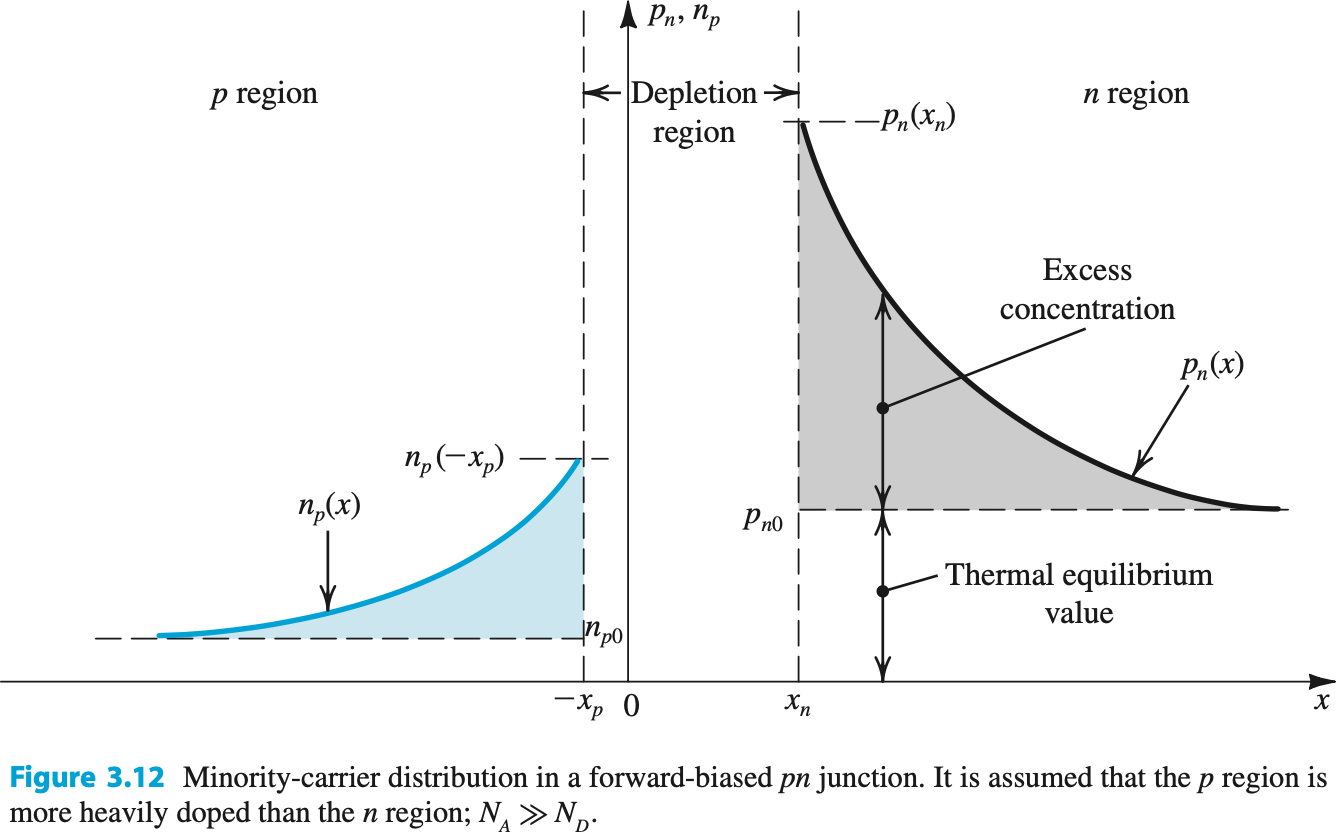

Considere una unión $ p n $ con polarización directa. En estado estacionario, se establecen distribuciones de portadores minoritarios en los materiales $ p $ y $ n $, como se muestra en la figura 3.12. Por lo tanto, una cierta cantidad del  exceso de carga  de los operadores minoritarios se almacena en cada una de las regiones de volumen $ p $ y $ n $ (fuera de la región de agotamiento). Si el voltaje terminal $ V $ cambia, esta carga tendrá que cambiar antes de que se logre un nuevo estado estable. Este fenómeno de almacenamiento de carga da lugar a otro  efecto capacitivo intrinseco, claramente diferente del debido al almacenamiento de carga en la región de agotamiento.

Para calcular el  exceso de carga de los portadores minoritarios, consulte la figura 3.12. La carga exceso de huecos almacenado en la región $ n $ se puede encontrar en el área sombreada debajo del exponencial de la siguiente manera: 
$$
\begin{aligned}
Q_ {p} & = A q \times \text{área sombreada debajo de} p_{n} (x) \text {curva} \\
& = A q \left [p_{n} \left(x_ {n} \right) -p_{n 0} \right] L_{p}
\end{aligned}
$$
Sustituyendo $ p_ {n} \left(x_ {n} \right) $ de la ecuación. (3.33) y usando la Ec. (3.37) nos permite expresar $ Q_ {p} $ como
$$
Q_ {p} = \frac{L_ {p} ^ {2}} {D_ {p}} I_ {p} \tag{3.50}
$$
El factor $ \left (L_ {p} ^ {2} / D_ {p} \right) $ que relaciona $ Q_ {p} $ con $ I_ {p} $ es un parámetro de dispositivo útil que tiene la dimensión de tiempo $ (\mathrm{s}) $ y se denota $ \tau_{p} $
$$
\tau_{p} = \frac{L_{p}^{2}}{D_ {p}}  \tag{3.51}
$$
Por lo tanto,
$$
Q_{p} = \tau_{p} I_{p}  \tag{3.52}
$$
La constante de tiempo $ \tau_ {p} $ se conoce como el exceso de vida de los portadores minoritários (huecos). Es el tiempo medio que tarda un hueco inyectado en la región n en recombinarse con un electrón mayoritario. Esta definición de $ \tau_ {p} $ implica que todo el cargo $ Q_ {p} $ desaparece y debe reponerse cada $ \tau_ {p} $ segundos. La corriente que logra el reabastecimiento es $ I_{p} = Q_ {p} / \tau_ {p} $. Esta es una derivación alternativa para la ecuación. (3,52). Una relación similar a la de la Ec. (3.52) se puede desarrollar para la carga electrónica almacenada en la región $ p $,
$$
Q_ {n} = \tau_{n} I_ {n}  \tag{3.53}
$$
donde $ \tau_{n} $ es el tiempo de vida del electrón en la región $ p $. El cargo total en exceso del operador de minorías se puede obtener sumando $ Q_ {p} $ y $ Q_ {n} $
$$
Q = \tau_ {p} I_ {p} + \tau_ {n} I_ {n}  \tag{3.54}
$$
Este cargo se puede expresar en términos de la corriente del diodo $ I = I_ {p} + I_ {n} $ como
$$
Q = \tau_{T} I  \tag{3.55}
$$
donde $ \tau_{T} $ se denomina tiempo medio de tránsito del cruce. Obviamente, $ \tau_{T} $ está relacionado con $ \tau_{p} $ y $ \tau_ {n} $. Además, para la mayoría de los dispositivos prácticos, un lado de la unión está mucho más dopado que el otro. Por ejemplo, si $ N_ {A} \gg N_ {D} $, se puede demostrar que $ I_ {p} \gg I_ {n}, I \simeq I_ {p}, Q_ {p} \gg Q_ {n }, Q \simeq Q_ {p} $, y por tanto $ \tau_{T} \simeq \ tau_ {p} $.

Para pequeños cambios alrededor de un punto de polarización, podemos definir una capacitancia de difusión incremental $ C_{d} $ como
$$
C_ {d} = \frac{d Q} {d V}  \tag{3.56}
$$
y puedo demostrar que
$$
C_ {d} = \left (\frac {\tau_ {T}} {V_ {T}} \right) I  \tag{3.57}
$$
donde $ I $ es la corriente de polarización directa. Tenga en cuenta que $ C_{d} $ es directamente proporcional a la corriente directa $ I $ y, por lo tanto, es insignificante cuando el diodo tiene polarización inversa. También tenga en cuenta que para mantener $ C_ {d} $ pequeño, el tiempo de tránsito $ \tau_{T} $ debe reducirse, un requisito importante para una unión $ p n $ destinada a operaciones de alta velocidad o alta frecuencia.

##El diodo ideal

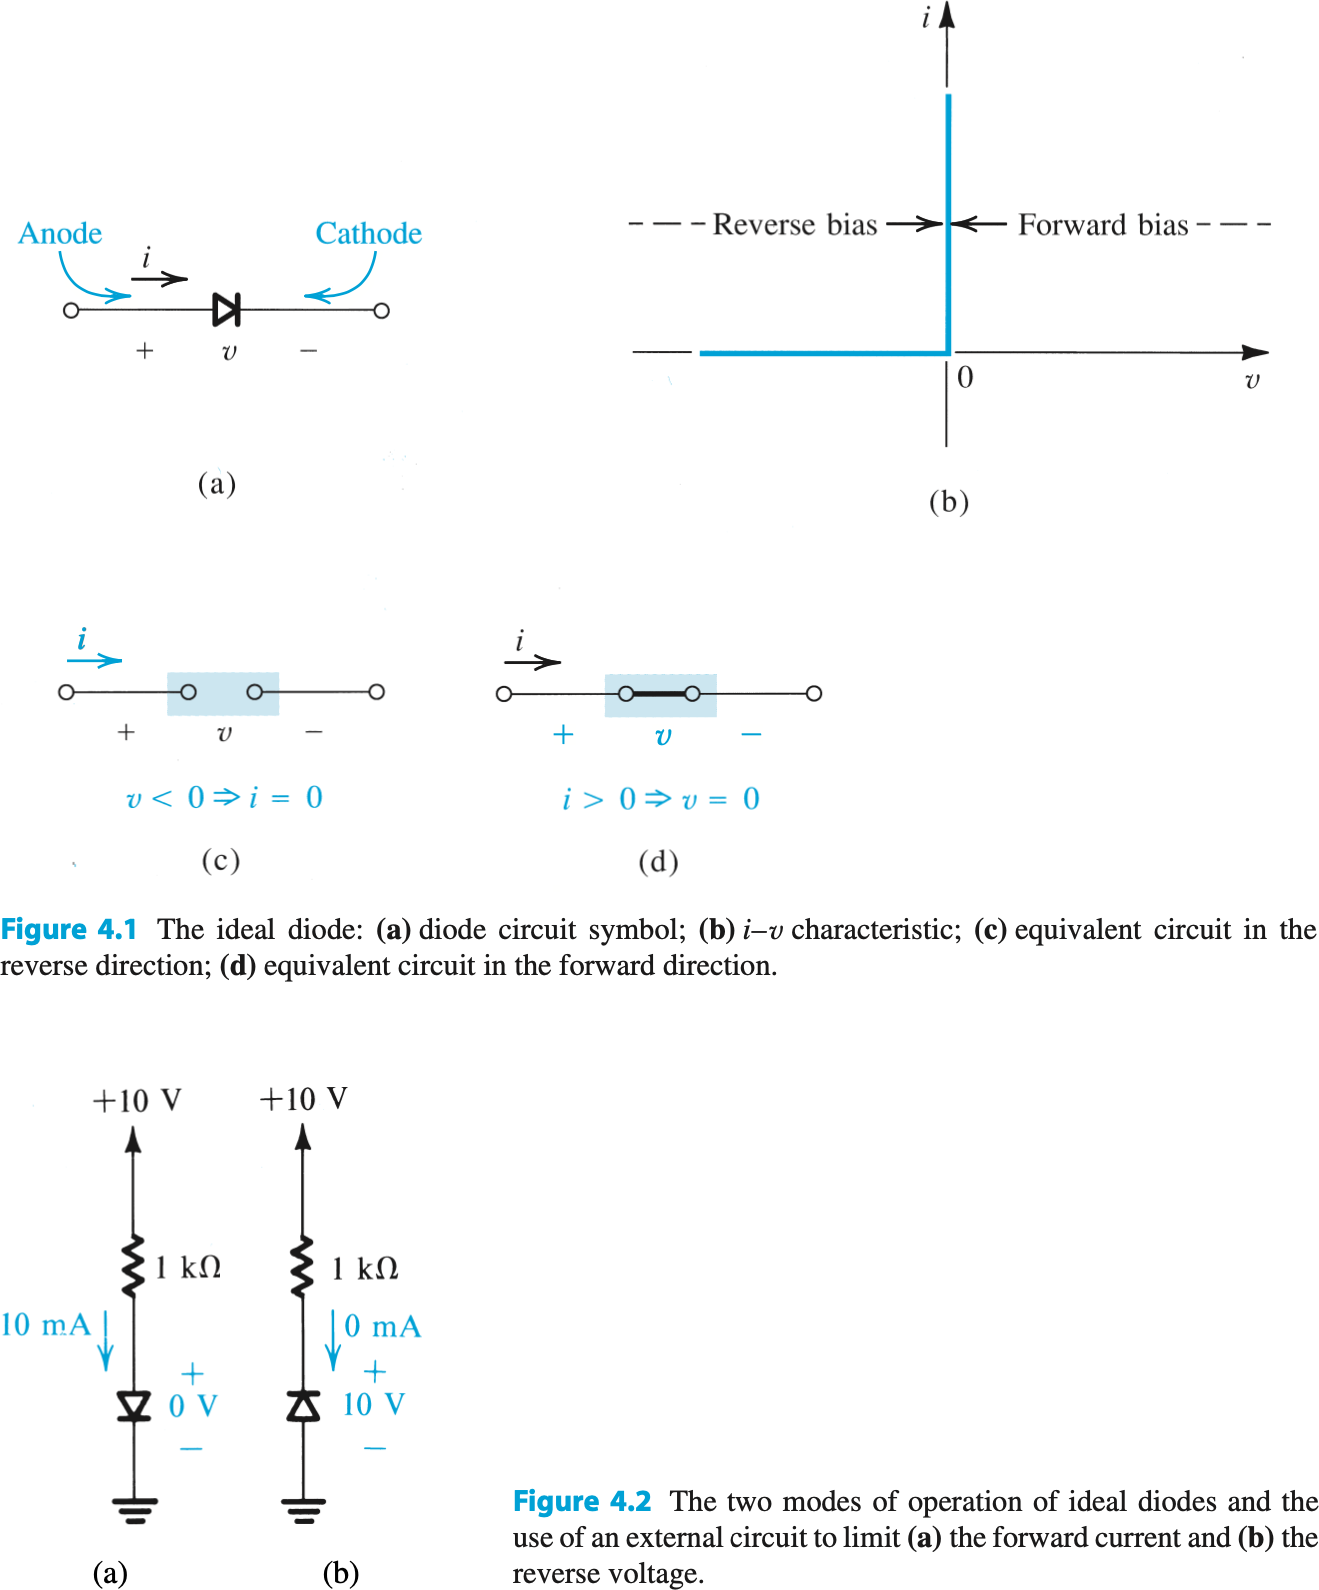

Se puede considerar que el diodo ideal es el elemento de circuito no lineal más fundamental. Es un dispositivo de dos terminales que tiene el símbolo de circuito de la figura $ 4.1 $ (a) y la característica $ i-v $ que se muestra en la figura 4.1 (b). La característica terminal del diodo ideal se puede interpretar de la siguiente manera: si se aplica un voltaje negativo (en relación con la dirección de referencia indicada en la Fig. 4.1a) al diodo, no fluye corriente y el diodo se comporta como un circuito abierto (Fig. 4.1c). Se dice que los diodos que funcionan en este modo tienen polarización inversa o funcionan en la dirección inversa. Un diodo ideal tiene corriente cero cuando se opera en la dirección inversa y se dice que está cortado o simplemente apagado.

Por otro lado, si se aplica una corriente positiva (relativa a la dirección de referencia indicada en la figura 4.1 (a) al diodo ideal, aparece una caída de voltaje cero a través del diodo. En otras palabras, el diodo ideal se comporta como un cortocircuito en la dirección de avance (Fig. 4.1d), pasa cualquier corriente con caída de voltaje cero. Se dice que un diodo polarizado hacia adelante está encendido, o simplemente encendido.

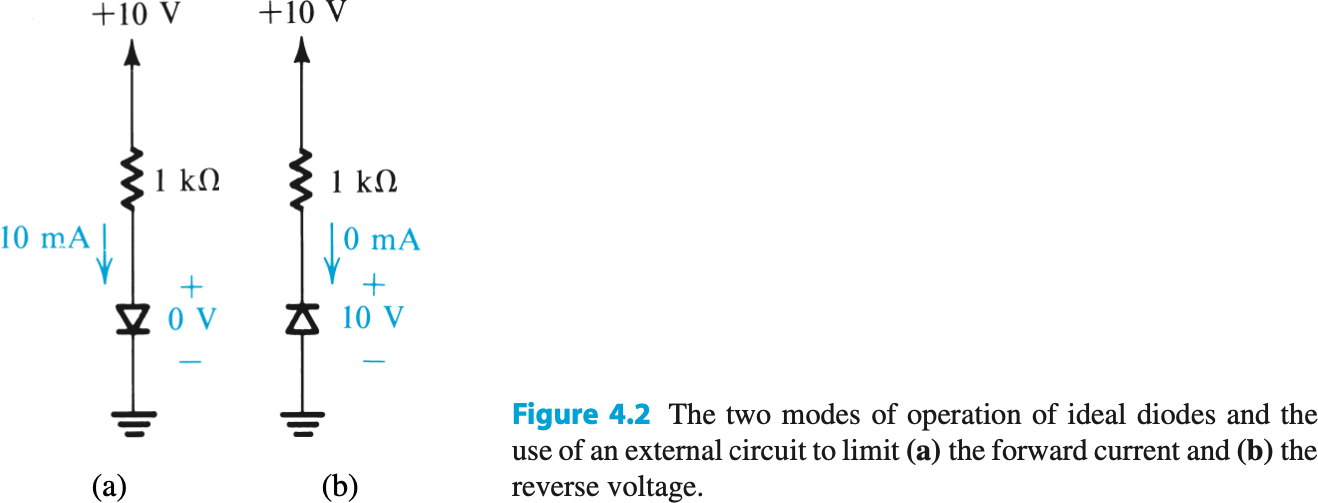

De la descripción anterior debe observarse que el circuito externo debe diseñarse para limitar la corriente directa a través de un diodo conductor, y la tensión inversa a través de un diodo de corte, a valores predeterminados. La figura $ 4.2 $ muestra dos circuitos de diodos que ilustran este punto. En el circuito de la figura 4.2 (a) el diodo obviamente es conductor. Por lo tanto, su caída de voltaje será cero, y la corriente a través de él estará determinada por el suministro de $ + 10- \mathrm {V} $ y la resistencia $ 1- \mathrm {k} \Omega $ como $ 10 \mathrm {~ mA}$ El diodo en el circuito de la figura 4.2 (b) obviamente está cortado y, por lo tanto, su corriente será cero, lo que a su vez significa que todo el suministro de $ 10- \mathrm {V} $ aparecerá como polarización inversa a través del diodo.

El terminal positivo del diodo se llama ánodo y el terminal negativo el símbolo de circuito con forma de flecha.

Como resultará evidente a partir de la descripción anterior, la característica $ i-v $ del diodo ideal es muy no lineal; aunque consta de dos segmentos de línea recta, están a $ 90 ^ {\circ} $ entre sí. Una curva no lineal que consta de segmentos de línea recta se dice que es lineal por partes. Si un dispositivo que tiene una característica lineal por partes se usa en una aplicación particular de tal manera que la señal a través de sus terminales oscila solo a lo largo de uno de los segmentos lineales, entonces el dispositivo puede considerarse un elemento de circuito lineal hasta ese circuito en particular.

####Características limite de los diodos de unión

La implementación más común del diodo utiliza una unión $ p n $. Hemos estudiado la física de la unión $ p n $ y hemos derivado su característica $ i-v $. Que la unión $ p n $ se use para implementar la función de diodo no debería ser una sorpresa: la unión $ p n $ puede conducir una corriente sustancial en la dirección de avance y casi ninguna corriente en la dirección inversa. En esta sección estudiamos la característica $ i-v $ del diodo de unión $ p n $ en detalle para prepararnos para aplicaciones de circuitos de diodos.

La figura $ 4.7 $ muestra la característica $ i-v $ de un diodo de unión de silicio. La misma característica se muestra en la Fig. $ 4.8 $ con algunas escalas expandidas y otras comprimidas para revelar detalles. Tenga en cuenta que los cambios de escala han dado como resultado la aparente discontinuidad en el origen.
Como se indicó, la curva característica consta de tres regiones distintas:
1. La región de polarización directa, determinada por $ v > 0 $
2. La región de polarización inversa, determinada por $ v < 0 $
3. La región de ruptura, determinada por $ v < -V_{Z K} $
Estas tres regiones de funcionamiento se describen a continuacion.

####Región de polarización directa

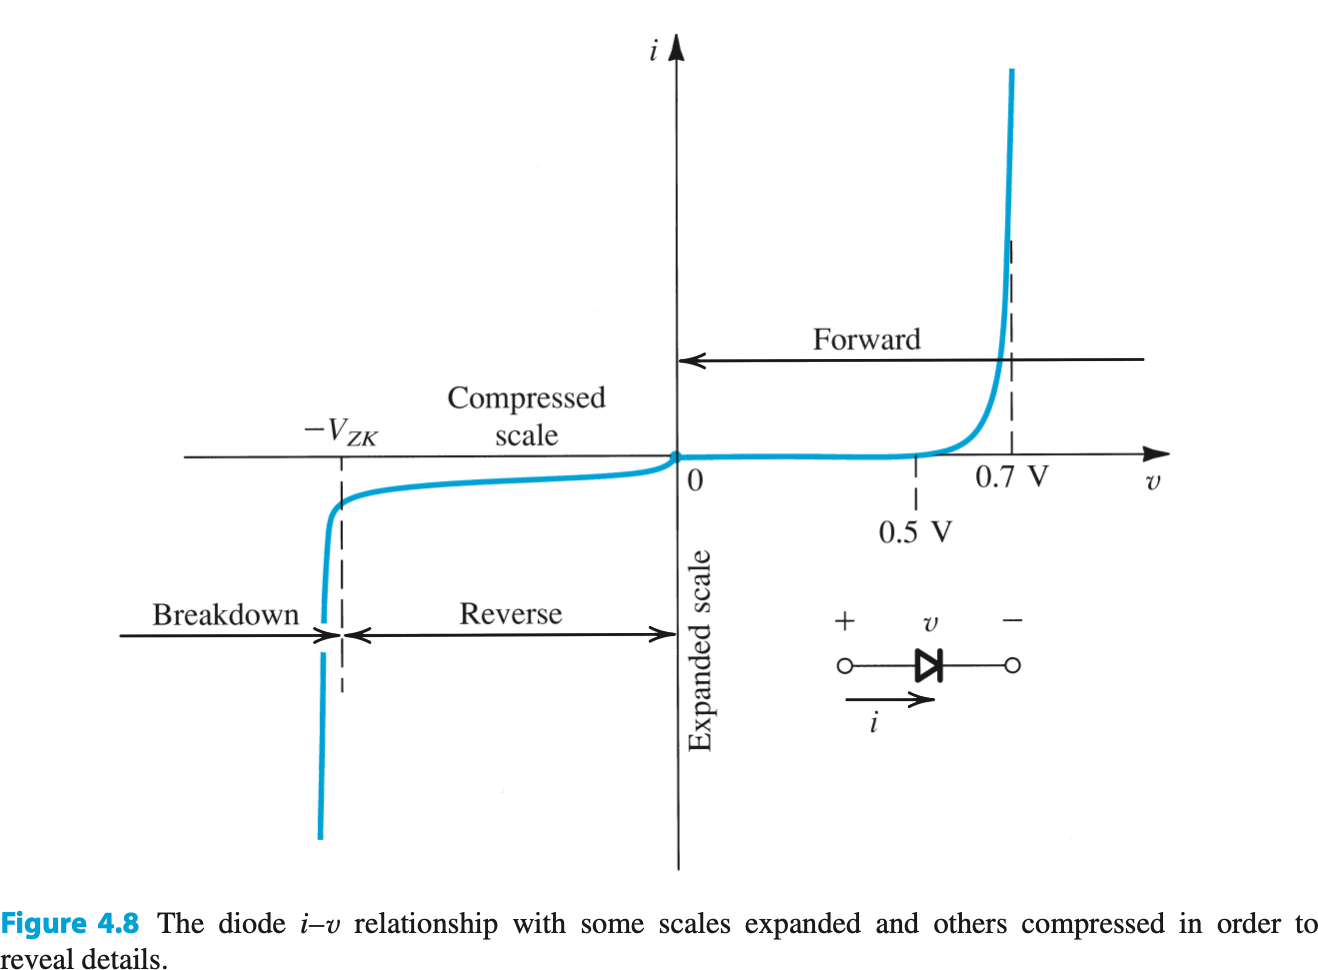

La región de operación de polarización directa o simplemente directa se ingresa cuando el voltaje terminal $ v $ es positivo. En la región hacia adelante, la relación $ i-v $ se aproxima mucho por

$$
i = I_{S} \left(e^{v/V_{T}} - 1 \right)  \tag{4.1}
$$

En esta ecuación $I_ {S} $ es una constante para un diodo dado a una temperatura dada. En la ecuación se dio una fórmula para $ I_ {S} $ en términos de los parámetros físicos del diodo y la temperatura. (3.41). La corriente $ I_{S} $ generalmente se llama corriente de saturación (por razones que se harán evidentes en breve). Otro nombre para $ I_ {S} $, y uno que usaremos ocasionalmente, es la corriente de  escalamiento. Este nombre surge del hecho de que $ I_ {S} $ es directamente proporcional al área de la sección transversal del diodo. Por lo tanto, duplicar el área de unión da como resultado un diodo con el doble del valor de $ I_ {S} $ y, como indica la ecuación del diodo, el doble del valor de la corriente $ i $ para un voltaje directo dado $ v $. Para los diodos de "señal-pequeña", que son diodos de pequeño tamaño destinados a aplicaciones de baja potencia, $ I_ {S} $ es del orden de $ 10 ^ {- 15} \mathrm{~ A} $. Sin embargo, el valor de $ I_ {S} $ es una función muy importante de la temperatura. Como regla general, $ I_ {S} $ duplica su valor por cada $ 5^ {\circ} \mathrm {C} $ aumento de temperatura.
El voltaje $ V_ {T} $ en la ecuación. (4.1) es una constante llamada voltaje térmico y está dada por
$$
V_ {T} = \frac{k T}{q} \tag{4.2}
$$
dónde
$ k = $ constante de Boltzmann $ = 8.62 \times 10 ^ {- 5} \mathrm {eV} / \mathrm {K} = 1.38 \times 10 ^ {- 23} $ julios / kelvin
$ T = $ la temperatura absoluta en kelvin $ = 273 + $ temperatura en $ {} ^ {\circ} \mathrm{C} $
$ q = $ la magnitud del cargo electrónico $ = 1.60 \times 10 ^ {- 19} $ Culombs
Sustituyendo $ k = 8.62 \times 10 ^ {- 5} \mathrm {eV} / \mathrm {K} $ en la ecuación. (4.2) da
$$
V_ {T} = 0.0862 T, \mathrm {mV} \tag{4.2a}
$$
Por lo tanto, a temperatura ambiente $ \left (20 ^ {\circ} \mathrm {C} \right) $ el valor de $ V_{T} $ es $ 25,3 \mathrm{mV} $. En el análisis de circuito aproximado rápido usaremos $ V_{T} \simeq 25 \mathrm {mV} $ a temperatura ambiente.

Para una corriente apreciable $ i $ en la dirección de avance, específicamente para $ i \gg I_{S} $, Eq. (4.1) se puede aproximar mediante la relación exponencial
$$
i \simeq I_{S} e ^ {v / V_{T}} \tag{4.3}
$$
Esta relación se puede expresar alternativamente en forma logarítmica.
$$
v = V_ {T} \ln \frac{i}{I_ {S}} \tag{4.4}
$$
donde $ \ln $ denota el logaritmo natural (base $ e $).
La relación exponencial de la corriente $ i $ con el voltaje $ v $ se mantiene durante muchas décadas de corriente (se puede encontrar un lapso de hasta siete décadas, es decir, un factor de $ 10 ^ {7} $). Esta es una propiedad bastante notable de los diodos de unión, que también se encuentra en los transistores de unión bipolar y que se ha aprovechado en muchas aplicaciones interesantes.

Consideremos la relación $ i-v $ hacia adelante en la ecuación. (4.3) y evalúe la corriente $ I_ {1} $ correspondiente a un voltaje de diodo $ V_ {1} $:
$$
I_ {1} = I_ {S} e ^ {V_ {1} / V_ {T}} 
$$
De manera similar, si el voltaje es $ V_ {2} $, la corriente del diodo $ I_ {2} $ será
$$
I_ {2} = I_ {S} e ^ {V_ {2} / V_ {T}} 
$$
Estas dos ecuaciones se pueden combinar para producir
$$
\frac {I_ {2}} {I_ {1}} = e ^ {\left (V_ {2} -V_ {1} \right) / V_ {T}}
$$
que se puede reescribir como
$$
V_ {2} -V_ {1} = V_ {T} \ln \frac {I_ {2}} {I_ {1}}
$$
o, en términos de logaritmos de base 10,
$$
V_ {2} -V_ {1} = 2.3 V_ {T} \log \frac {I_ {2}} {I_ {1}} \tag{4.5}
$$
Esta ecuación simplemente establece que durante una década (factor de 10 $) $ cambio en la corriente, la caída de voltaje del diodo cambia en $ 2.3 V_ {T} $, que es aproximadamente $ 60 \mathrm {mV} $. Esto también sugiere que la relación del diodo $ i-v $ se traza más convenientemente en papel semilogarítmico. Usando el eje lineal vertical para $ v $ y el eje logarítmico horizontal para $ i $, se obtiene una línea recta con una pendiente de $ 60 \mathrm {mV} $ por década de corriente.

####Región de polarización inversa

La región de operación de polarización inversa se ingresa cuando el voltaje del diodo $ v $ se vuelve negativo. La ecuación (4.1) predice que si $ v $ es negativo y algunas veces mayor que $ V_ {T} (25 \mathrm {mV}) $ en magnitud, el término exponencial se vuelve insignificante en comparación con la unidad, y la corriente del diodo se vuelve
$$
i \simeq-I_ {S}
$$
Es decir, la corriente en la dirección inversa es constante e igual a $ I_ {S}. $ Esta constancia es la razón detrás del término corriente de saturación.

Los diodos reales exhiben corrientes inversas que, aunque son bastante pequeñas, son mucho mayores que $ I_ {S} $. Por ejemplo, un diodo de pequeña señal cuyo $ I_ {S} $ es del orden de $ 10 ^ {- 14} \mathrm {~ A} $ a $ 10 ^ {- 15} \mathrm {~ A} $ podría mostrar un corriente inversa del orden de $ 1 \mathrm {nA}. $ La corriente inversa también aumenta algo con el aumento en la magnitud del voltaje inverso. Tenga en cuenta que debido a la magnitud muy pequeña de la corriente, estos detalles no son claramente evidentes en la característica del diodo $ i-v $ de la figura $ 4.8 $.

Una gran parte de la corriente inversa se debe a efectos de fuga. Estas corrientes de fuga son proporcionales al área de unión, al igual que $ I_ {S} $. Sin embargo, su dependencia de la temperatura es diferente de la de $ I_ {S} $. Por lo tanto, mientras que $ I_ {S} $ se duplica por cada $ 5 ^ {\circ} \mathrm {C} $ de aumento de temperatura, la regla general correspondiente para la dependencia de la temperatura de la corriente inversa es que se duplica por cada $ 10 ^ { \circ} \mathrm {C} $ aumento de temperatura.

####Región de ruptura

La tercera región distinta de funcionamiento del diodo es la región de ruptura, que se identifica en la característica del diodo $ i-v $ en la figura 4.8. La región de ruptura significa que la magnitud del voltaje inverso excede un valor de umbral que es específico del diodo, llamado voltaje de ruptura. Este es el voltaje en el "codo" de $ i $ Fig. $ 4.8 $ y se denota $ V_ {Z K} $, donde el subíndice $ Z $ representa zener (ver Sección 3, denota codo.

Como puede verse en la figura 4.8, en la región de ruptura, la corriente inversa aumenta y el aumento asociado en la caída de voltaje es muy pequeño. La avería del diodo no es destructiva, siempre que la potencia disipada en el diodo esté limitada por un nivel externo "seguro". Este valor seguro normalmente se especifica en las hojas de datos del dispositivo. Es necesario limitar la corriente inversa en la región de ruptura a un valor consistente en la disipación de potencia permitida.

El hecho de que la característica de ruptura del diodo $ i-v $ es casi una línea vertical para ser utilizada en la regulación de voltaje. Este tema se estudiará en la Sección $ 4.5 $.

##Taller

###Juntura pn 

1. En una unión PN sin voltaje externo, el campo eléctrico entre los iones aceptores y donantes se denomina

   A.   Un pico

   B.   Barrera

   C.   Umbral

   D.   Camino



2. En una unión PN, la barrera potencial se debe a las cargas a ambos lados de la unión, estas cargas son

   A.   Portadores mayoritarios

   B.   Portandores minoritarios

   C.   Tanto (a) como (b)

   D.   Iones donantes y aceptores fijos




3. La capacitancia de una unión PN con polarización inversa

   A.   Aumenta a medida que aumenta la polarización inversa

   B.   Disminuye a medida que aumenta la polarización inversa

   C.   Aumenta a medida que disminuye la polarización inverso

   D.   Es insignificantemente bajo


4. En una unión PN sin voltaje aplicado

   A.   La corriente de unión se debe únicamente a los portadores minoritarios.

   B.   La corriente de unión en equilibrio es igual a cero, pero los portadores opuestos están cruzando la unión.

   C.   La corriente de unión se reduce con el aumento de temperatura.

   D.   La corriente de unión en equilibrio es cero ya que las cargas no cruzan la unión


5. Para un diodo de unión PN, la corriente en polarización inversa puede ser

   A.   Pocos miliamperios

   B.   Entre 0,2 A y 15 A

   C.   Pocos amperios

   D.   Pocos micro o nano amperios



6. Cuando la unión PN está en polarización directa, aumentando el voltaje de la batería

   A.   Aumenta la resistencia del circuito

   B.   La corriente a través de la unión pn aumenta

   C.   Corriente a través de la unión pn disminuye

   D.   No ocurre nada de lo anterior


7. Cuando una unión PN tiene polarización inversa

   A.   Los huecos y los electrones tienden a concentrarse hacia la unión

   B.   La barrera tiende a romperse

   C.   Los huecos y los electrones tienden a alejarse de la unión

   D.  Ninguna de las anteriores



8. En una unión PN cuando el voltaje aplicado supera el potencial ......, la corriente del diodo es grande, lo que se conoce como ......

   A.   Agotamiento, polarización negativa

   B.   Inversa, polarización inversa

   C.   Resistance, polarizaciòn inversa

   D.   Barrier, polarización directa


9. Se dice que una unión PN está polarizada directamente cuando

   A.   El terminal positivo de la batería está conectado al lado P y el lado negativo al lado N

   B.   La unión está conectada a tierra

   C.   El lado C.N está conectado directamente al lado p

   D.   El terminal positivo de la batería está conectado al lado N y el lado negativo al lado P


10. Una unión PN

   A.   Tiene baja resistencia tanto en dirección directa comoinversa

   B.   Tiene una alta resistencia tanto en dirección diircta como inversa

   C.   Conduce solo en la direccion directa

   D.   Conduce en dirección inveersa solamente


11. La falla de la unión PN por debajo de 5 V es causada principalmente por:

   A. Ruptura de Avalancha

   B. Ruptura de Zener

   C. Cualquiera de (a) y (b) anteriores

   D. Ninguna de las anteriores



12. Como una unión PN tiene polarización directa
   Los huecos y los electrones tienden a alejarse de la unión.

   A.  La región de agotamiento disminuye

   B.  La barrera tiende a romperse

   C. Cualquiera de (a) y (b) anteriores

   D.  Ninguna de las anteriores





13. En una unión PN con polarización inversa, la corriente a través de la unión aumenta abruptamente en

   A  0.5 V

   B. 1.1 V

   C. 0.72 V

   D. Voltaje de ruptura




14. La principal razón por la que los electrones pueden tunelar a través de una unión PN es que

   A.   El potencial de barrera es muy bajo

   B.   Tienen mucha energía

   C.   El nivel de impureza es bajo

   D.   La capa de agotamiento es extremadamente delgada





15. Una unión PN se puede fabricar mediante en un proceso que puede ser de

   A. Difusivo

   B. Aleaciones

   C. Crecimiento por capas

   D. Cualquiera de (a) y (b) anteriores



16. En uniones PN con polarización inversa

   A.   Hay una corriente neta de electrones

   B.   Hay una corriente neta de huecos

   C.   Hay una capa de agotamiento muy estrecha

   D.   Hay casi corriente cero




17. La capa de agotamiento de un diodo de unión PN tiene

   A. Solo huecos móviles libres

   B. Solo electrones móviles libres

   C. Tanto huecos como electrones móviles libres

   D. Ni electrones móviles libres ni huecos.




18. La región de agotamiento de una unión PN es una que está agotada de

   A.  Portadores móviles

   B.  Huecos móviles

   C.  Átomos

   D.  Ninguna de las anteriores




19. La barrera potencial existente a través de una unión PN corresponde a

   A. Ancho de la barrera

   B. Polarización inversa de la unión

   C. Polarización direecta de la unión

   D. Altura de la barrera




20. Los electrones móviles del lado P del diodo de unión PN constituyen

   A. Portadores de corriente de minorías

   B. Portadores corriente mayoritarios

   C. Dependiendo del voltaje, pueden ser portadores de corriente mayoritarios o minoritarios.

   D. Ninguna de las anteriores



21. Cuando una unión PN tiene polarización inversa

   A. Los huecos y los electrones se alejan de la unión.

   B. Disminuye la región de agotamiento

   C. No hay movimiento de portadores

   D. Ninguna de las anteriores

###Respuestas

####P1

B

####P2

D

####P3

C

####P4

B

####P5

D

####P6

B

####P7

C

####P8

D

####P9

A

####P10

C

####P11

C

####P12

B

####P13

D

####P14

D

####P15

D

####P16

D

####P17

D

####P18

A

####P19

D

####P20

A

####P21

A

##Modelos para las características de un diodo

Habiendo estudiado las características de los terminales de diodos, ahora estamos listos para considerar el análisis de circuitos que emplean diodos conductores directos. La figura $ 4.10 $ muestra dicho circuito. Consiste en una fuente de cd $ V_ {D D} $, una resistencia $ R $ y un diodo. Deseamos analizar este circuito para determinar el voltaje del diodo $ V_ {D} $ y la corriente $ I_ {D} $. Para ayudar en nuestro análisis, necesitamos representar el diodo con un modelo. Hay una variedad de modelos de diodos, de los cuales ahora conocemos dos: el modelo de diodo ideal y el modelo exponencial. En la siguiente discusión evaluaremos la idoneidad de estos dos modelos en diversas situaciones de análisis. Además, desarrollaremos y comentaremos otros modelos. Este material, además de ser útil en el análisis y diseño de circuitos de diodos, establece una base para el modelado del funcionamiento de los transistores que estudiaremos en el capítulo 2.

### Características directas

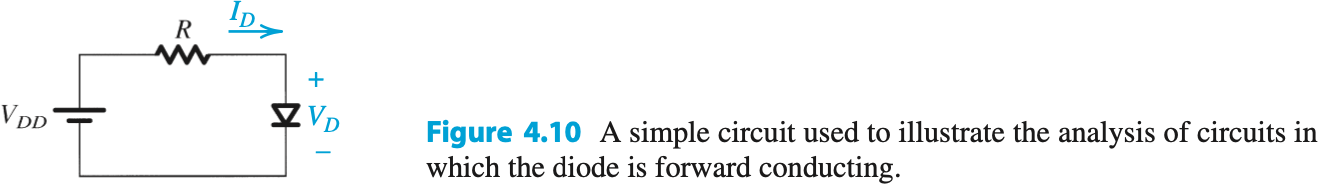

####Modelo exponencial

La descripción más precisa del funcionamiento del diodo en la región directa la proporciona el modelo exponencial. Sin embargo, desafortunadamente, su naturaleza severamente no lineal hace que este modelo sea el más difícil de usar. Para ilustrarlo, analicemos el circuito de la figura $ 4.10 $ usando el modelo de diodo exponencial.

Suponiendo que $ V_ {DD} $ es mayor que $ 0.5 \mathrm {~ V} $ más o menos, la corriente del diodo será mucho mayor que $ I_ {S} $, y podemos representar la característica del diodo $ iv $ mediante la exponencial relación, resultando en
$$
I_ {D} = I_ {S} e ^ {V_ {D} / V_ {T}}\tag{4.6}
$$
La otra ecuación que gobierna el funcionamiento del circuito se obtiene escribiendo una ecuación de bucle de Kirchhoff, lo que da como resultado
$$
I_ {D} = \frac{V_ {D D} -V_ {D}} {R}\tag{4.7}
$$
Suponiendo que se conoce el parámetro de diodo $ I_ {S} $, las enteriores  son dos ecuaciones en las dos cantidades desconocidas $ I_ {D} $ y $ V_ {D}. $ Dos formas alternativas de obtener la solución son el análisis gráfico y el análisis iterativo.

####Análisis gráfico

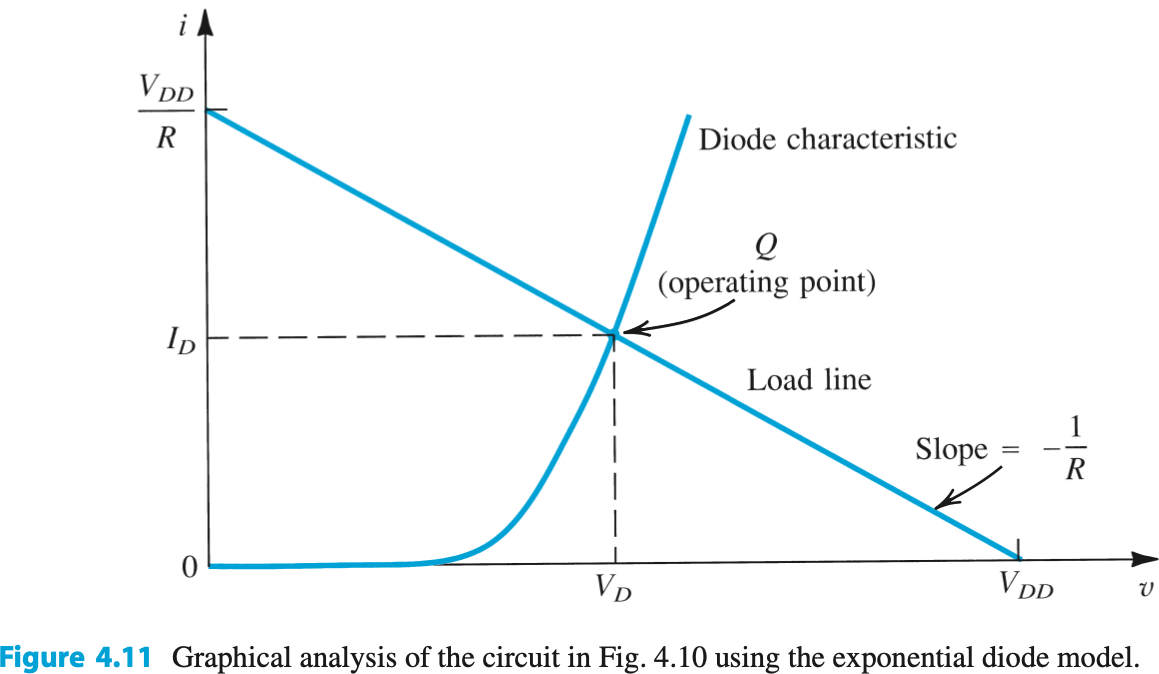

El análisis gráfico se realiza trazando las relaciones de las ecuaciones. (4.6) y (4.7) en el plano $ i-v $. Entonces, la solución se puede obtener como las coordenadas del punto de intersección de las dos gráficas. En la figura 4.11 se muestra un esquema de la construcción gráfica. La curva representa la ecuación del diodo exponencial (Ec. 4.6), y la línea recta representa la Ec. (4,7). Esta línea recta se conoce como línea de carga, un nombre que adquirirá más significado en capítulos posteriores. La línea de carga se cruza con la curva del diodo en el punto $ Q $, que representa el punto de funcionamiento del circuito. Sus coordenadas dan los valores de $ I_ {D} $ y $ V_ {D} $.

El análisis gráfico ayuda a visualizar el funcionamiento del circuito. Sin embargo, el esfuerzo que implica realizar un análisis de este tipo, en particular para circuitos complejos, es demasiado grande para justificarse en la práctica.

####Análisis iterativo

Las ecuaciones (4.6) y (4.7) se pueden resolver usando un procedimiento iterativo simple, como se ilustra en el siguiente ejemplo.

#####Ejemplo (análisis iterativo)

Determine la corriente $ I_ {D} $ y el voltaje del diodo $ V_ {D} $ para el circuito de la figura $ 4.10 $ con $ V_ {DD} = 5 \mathrm {~ V} $ y $ R = 1 \mathrm { k} \Omega $. Suponga que el diodo tiene una corriente de $ 1 \mathrm {~ mA} $ a un voltaje de $ 0.7 \mathrm {~ V} $.
Solución
Para comenzar la iteración, asumimos que $ V_ {D} = 0.7 \mathrm {~ V} $ y usamos la Ec. (4.7) para determinar la corriente,
$$
\begin{aligned}
I_{D} &=\frac{V_{D D}-V_{D}}{R} \\
&=\frac{5-0.7}{1}=4.3 \mathrm{~mA}
\end{aligned}
$$
Luego usamos la ecuación del diodo para obtener una mejor estimación de $ V_ {D} $. Esto se puede hacer empleando la ecuación. (4.5), a saber,
$$
V_{2}-V_{1}=2.3 V_{T} \log \frac{I_{2}}{I_{1}}
$$
Sustituyendo $ 2.3 V_ {T} = 60 \mathrm {mV} $, tenemos
$$
V_{2}=V_{1}+0.06 \log \frac{I_{2}}{I_{1}}
$$
Sustituyendo $ V_ {1} = 0.7 \mathrm {~ V}, I_ {1} = 1 \mathrm {~ mA} $ y $ I_ {2} = 4.3 \mathrm {~ mA} $ da como resultado $ V_ {2 } = 0,738 \mathrm {~ V} $. Por tanto, los resultados de la primera iteración son $ I_ {D} = 4.3 \mathrm {~ mA} $ y $ V_ {D} = 0.738 \mathrm {~ V} $. La segunda iteración procede de manera similar:
$$
\begin{aligned}
I_{D} &=\frac{5-0.738}{1}=4.262 \mathrm{~mA} \\
V_{2} &=0.738+0.06 \log \left[\frac{4.262}{4.3}\right] \\
&=0.738 \mathrm{~V}
\end{aligned}
$$
Por lo tanto, la segunda iteración produce $ I_ {D} = 4.262 \mathrm {~ mA} $ y $ V_ {D} = 0.738 \mathrm {~ V} $. Dado que estos valores están muy cerca de los valores obtenidos después de la primera iteración, no se necesitan más iteraciones y la solución es $ I_ {D} = 4.262 \mathrm {~ mA} $ y $ V_ {D} = 0.738 \mathrm { ~ V} $.

####Modelo de la caida de voltaje constante

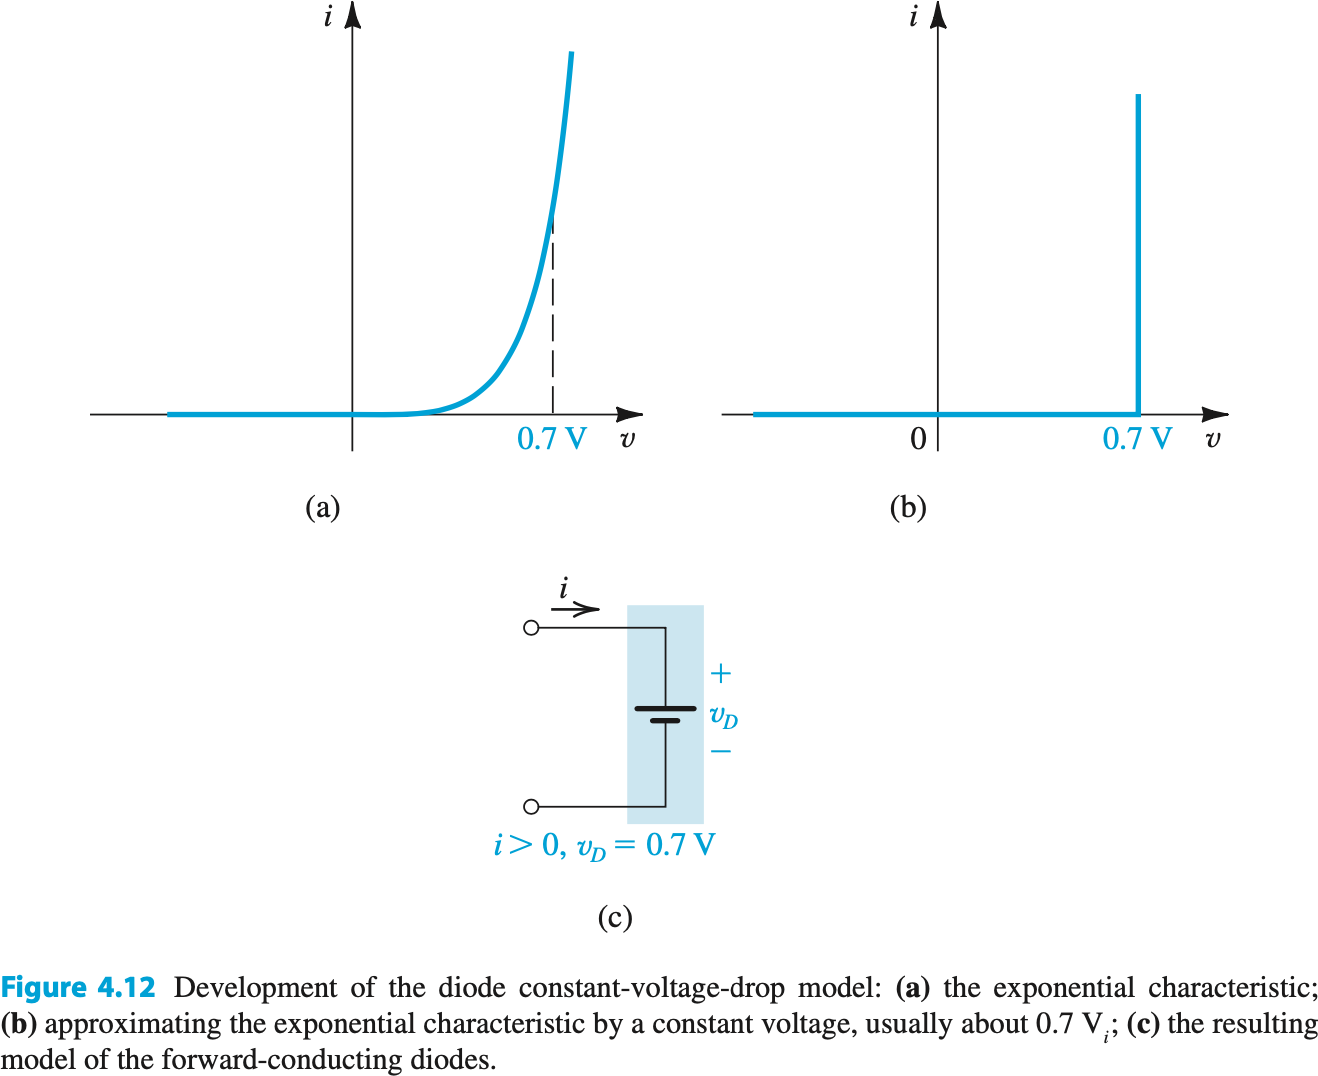

El modelo de diodo más simple y más utilizado es el modelo de caída de voltaje constante. Este modelo se basa en la observación de que un diodo de conducción directa tiene una caída de voltaje que varía en un rango relativamente estrecho, digamos, de $0.6$ a $0.8 V$. El modelo asume que este voltaje es constante en un valor, digamos, $0.7 V$. El desarrollo se ilustra en la figura 4.12.
El modelo de caída de tensión constante es el que se emplea con más frecuencia en las fases iniciales de análisis y diseño. Esto es especialmente cierto si en estas etapas no se dispone de información detallada sobre las características del diodo, que suele ser el caso.

Finalmente, observe que si empleamos el modelo de caída de voltaje constante para resolver el problema del ejemplo 4.4, obtenemos
$$
V_{D}=0.7 \mathrm{~V}
$$
y
$$
\begin{aligned}
I_{D} &=\frac{V_{D D}-0.7}{R} \\
&=\frac{5-0.7}{1}=4.3 \mathrm{~mA}
\end{aligned}
$$
que no son muy diferentes de los valores obtenidos antes con el modelo exponencial más elaborado.

####Modelo de señal pequeña

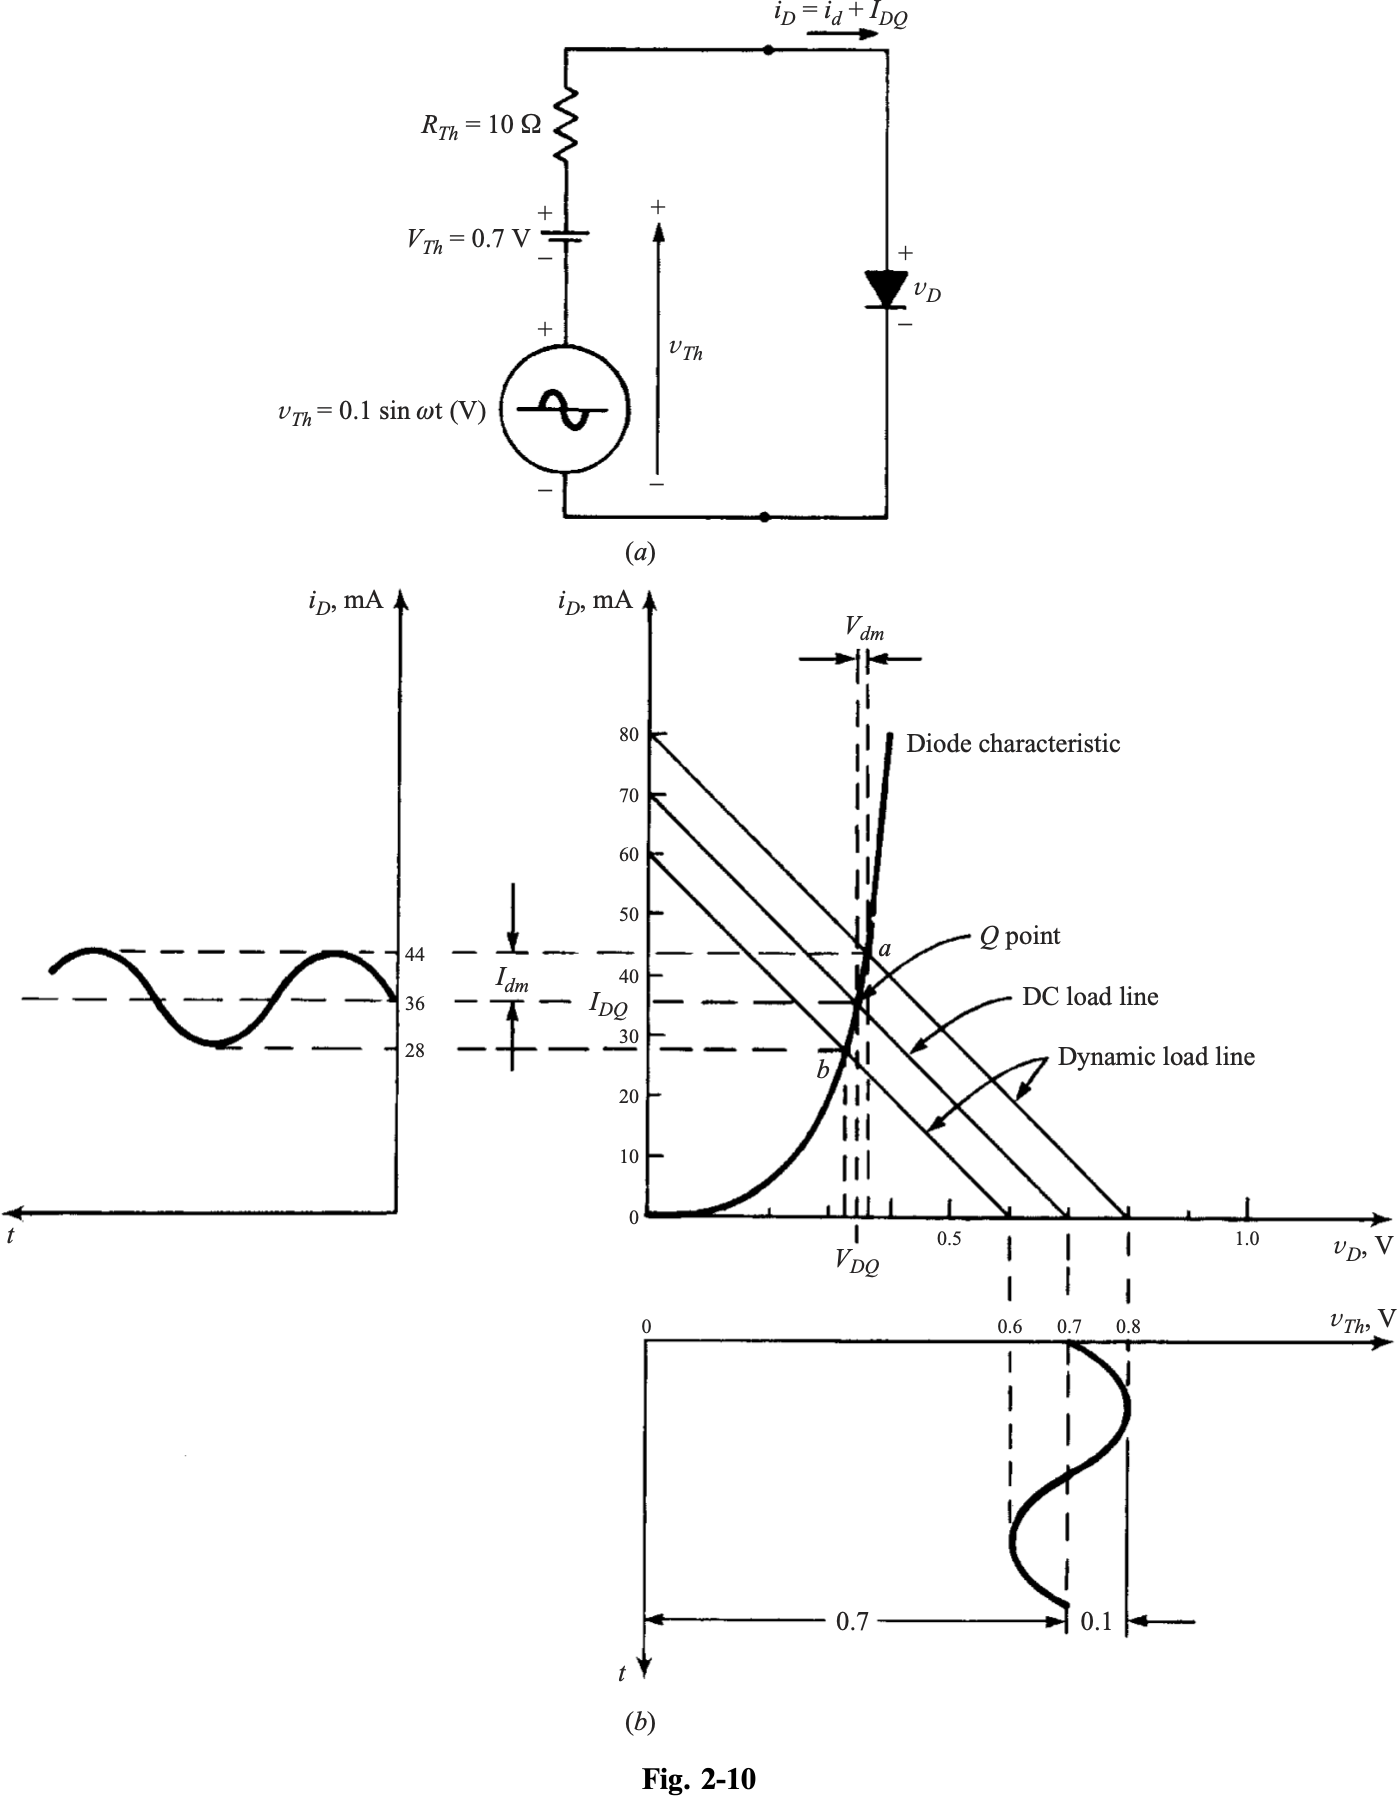

El análisis de señales pequeñas se puede aplicar al circuito de diodos de la figura 2-10 si la amplitud de la señal de CA $ v_ {T h} $ es lo suficientemente pequeña como para que la curvatura de la característica del diodo en el rango de operación (desde $ b $ a $ a $) pueden ignorarse. Entonces, el voltaje y la corriente del diodo pueden escribirse cada uno como la suma de una señal de CC y una señal de CA no distorsionada. Además, la relación entre el voltaje de CA del diodo $ v_ {d} $ y la corriente de CA del diodo $ i_ {d} $ será constante e igual a
$$
\frac{v_{d}}{i_{d}}=\frac{2 V_{d m}}{2 I_{d m}}=\frac{\left.v_{D}\right|_{a}-\left.v_{D}\right|_{b}}{\left.i_{D}\right|_{a}-\left.i_{D}\right|_{b}}=\left.\frac{\Delta v_{D}}{\Delta i_{D}}\right|_{Q}=\left.\frac{d v_{D}}{d i_{D}}\right|_{Q} \equiv r_{d}
$$
donde $ r_ {d} $ se conoce como la resistencia dinámica del diodo. De ello se desprende (del argumento de un circuito lineal) que los componentes de la señal de ca pueden determinarse mediante el análisis del circuito de "pequeña señal" de la figura 2-12; si la frecuencia de la señal de CA es grande, se puede colocar un capacitor en paralelo con $ r_ {d} $ para modelar la capacitancia de agotamiento o difusión. Los componentes de la señal de $dc$ o inactiva generalmente deben determinarse mediante métodos gráficos, ya que, en general, la característica del diodo no es lineal.

#####Ejemplo

A. Para el circuito de la figura 2-10, determine $ i_ {D} $.
La corriente de punto $ Q $ $ I_ {D Q} $ se ha determinado como $ 36 \mathrm {~ mA} $ (consulte el Ejemplo 2.7). La resistencia dinámica del diodo en el punto $ Q $ se puede evaluar gráficamente:
$$
r_{d}=\frac{\Delta v_{D}}{\Delta i_{D}}=\frac{0.37-0.33}{0.044-0.028}=2.5 \Omega
$$
Ahora se puede analizar el circuito de pequeña señal de la figura $ 2.12 $ para encontrar $ i_ {d} $:
$$
i_{d}=\frac{v_{T h}}{R_{T h}+r_{d}}=\frac{0.1 \sin \omega t}{10+2.5}=0.008 \sin \omega t \quad \mathrm{~A}
$$
La corriente total del diodo se obtiene por superposición y concuerda bien con la que se encuentra en el Ejemplo 2.7:
$$
i_{D}=I_{D Q}+i_{d}=36+8 \sin \omega t \quad \mathrm{~mA}
$$


B. Para el circuito de la figura 2-10, determine $ i_ {D} $ si $ \omega = 10 ^ {8} \mathrm {rad} / \ \mathrm {s} $ y se sabe que la capacitancia de difusión es $ 5000 \mathrm {pF} $.

Del Ejemplo $ 2.8, r_ {d} = 2.5 \Omega $. La capacitancia de difusión $ C_{d} $ actúa en paralelo con $ r_{d} $ para dar la siguiente impedancia equivalente para el diodo, como se ve por la señal de CA:
$$
\begin{aligned}
Z_{d} &=r_{d}\left\|j x_{d}=r_{d}\right\|\left(-j \frac{1}{\omega C_{d}}\right)=\frac{r_{d}}{1+j \omega C_{d} r_{d}}=\frac{2.5}{1+j\left(10^{8}\right)\left(5000 \times 10^{-12}\right)(2.5)} \\
&=1.56\left\llcorner-51.34^{\circ}=0.974-j 1.218\right.
\end{aligned}
$$
En el dominio de la frecuencia, el circuito de pequeña señal (figura 2-12) produce
$$
\bar{I}_{d}=\frac{\bar{V}_{T h}}{R_{T h}+Z_{d}}=\frac{0.1\left\lfloor-90^{\circ}\right.}{10+0.974-j 1.218}=\frac{0.1\left\lfloor-90^{\circ}\right.}{11.041\left[-6.33^{\circ}\right.}=0.0091\left\lfloor-83.67^{\circ} \mathrm{A}\right.
$$
En el dominio del tiempo, con $ I_ {D Q} $ como se encuentra en el Ejemplo 2.7, tenemos
$$
i_{D}=I_{D Q}+i_{d}=36+9.1 \cos \left(10^{8} t-83.67^{\circ}\right) \mathrm{mA}
$$

####Modelo de diodo ideal

En aplicaciones que involucran voltajes mucho mayores que la caída de voltaje del diodo $ (0.6 \mathrm {~ V} -0.8 \mathrm {~ V}) $, podemos ignorar la caída de voltaje del diodo por completo mientras calculamos la corriente del diodo. El resultado es el modelo de diodo ideal, que estudiamos en la Sección 4.1. Para el circuito del Ejemplo anterior (es decir, Fig. $ 4.10 $ con $ V_ {DD} = 5 \mathrm {~ V} $ y $ R = 1 \mathrm {k} \Omega $), la utilización del diodo ideal modelo lleva a
$$
\begin{aligned}
&V_{D}=0 \mathrm{~V} \\
&I_{D}=\frac{5-0}{1}=5 \mathrm{~mA}
\end{aligned}
$$
lo que para un análisis muy rápido no estaría mal como estimación bruta. Sin embargo, casi sin trabajo adicional, el modelo de caída de 0,7 V produce resultados mucho más realistas. Sin embargo, observamos que la mayor utilidad del modelo de diodo ideal es determinar qué diodos están encendidos y cuáles están apagados en un circuito multidiodo, como los considerados anteriormente.

### Características en la region Zener

#### Diodo Zener

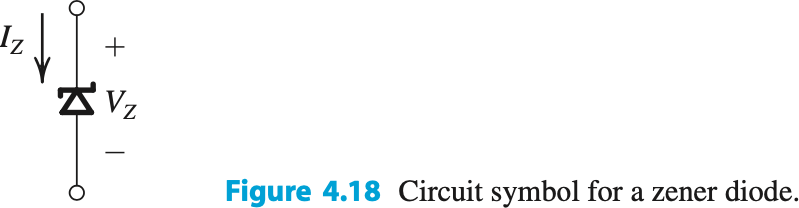

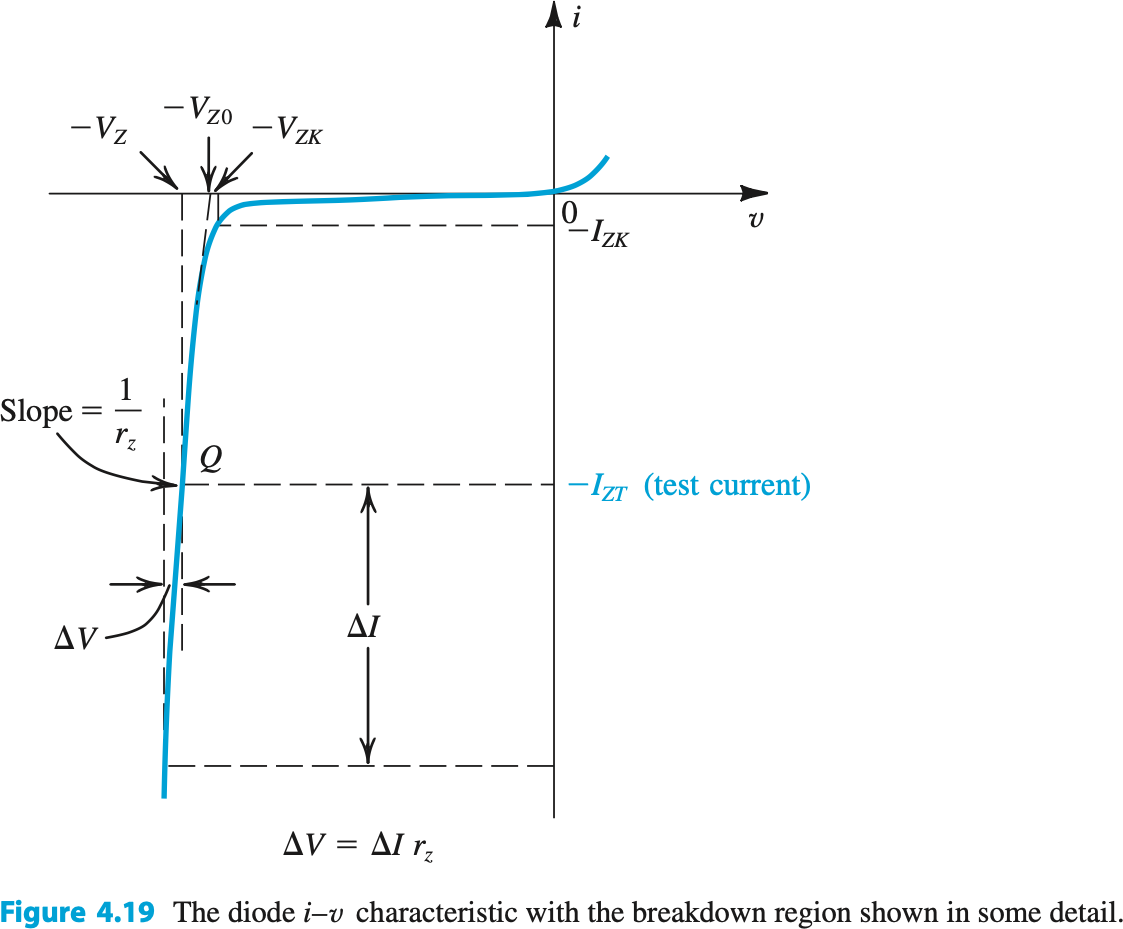

La curva $i – v$ muy pronunciada que exhibe el diodo en la región de ruptura (Fig. 4.8) y la caída de voltaje casi constante que esto indica sugieren que los diodos que operan en la región de ruptura pueden usarse en el diseño de reguladores de voltaje. Los reguladores de voltaje son circuitos que proporcionan un voltaje de salida de $dc$ constante ante cambios en su corriente de carga y en el voltaje de la fuente de alimentación del sistema. De hecho, esto resulta ser una aplicación importante de los diodos que operan en la región de ruptura inversa, y se fabrican diodos especiales para operar específicamente en la región de ruptura. Dichos diodos se denominan diodos de ruptura o, más comúnmente, como se señaló anteriormente, diodos Zener.
La figura 4.18 muestra el símbolo del circuito del diodo Zener. En aplicaciones normales de diodos Zener, la corriente fluye hacia el cátodo y el cátodo es positivo con respecto al ánodo. Así, Z y VZ en la Figura 4.18 tienen valores positivos.

#####Modelo para el diodo Zener

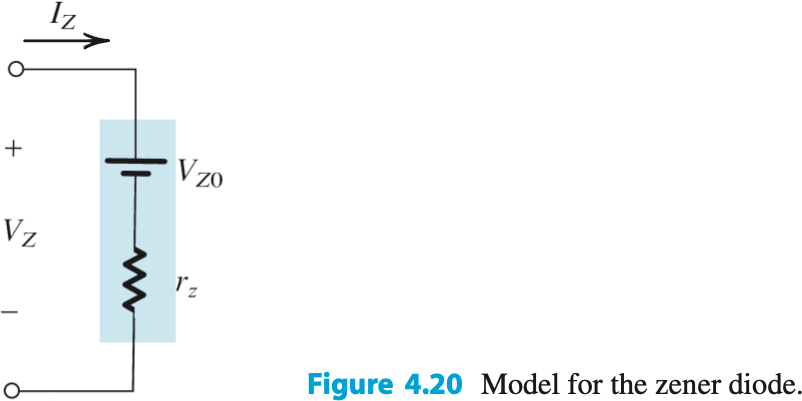

La figura $ 4.19 $ muestra detalles de la característica del diodo $ i-v $ en la región de ruptura. Observamos que para corrientes mayores que la corriente de rodilla $ I_ {Z K} $ (especificada en la hoja de datos del diodo Zener), la característica $ i-v $ es casi una línea recta. El fabricante generalmente especifica el voltaje a través del diodo Zener $ V_ {Z} $ a una corriente de prueba especificada, $ I_ {Z T} $. Hemos indicado estos parámetros en la figura $ 4.19 $ como las coordenadas del punto etiquetado $ Q $. Por lo tanto, un diodo Zener de 6.8 V exhibirá una caída de $ 6.8- \mathrm {V} $ a una corriente de prueba especificada de, digamos, $ 10 \mathrm {~ mA} $. A medida que la corriente a través del zener se desvía de $ I_ {Z T} $, el voltaje a través de él cambiará, aunque solo ligeramente. La figura $ 4.19 $ muestra que, correspondiente al cambio actual $ \Delta I $, el voltaje zener cambia en $ \Delta V $, que está relacionado con $ \Delta I $ por
$$
\Delta V = r_ {z} \Delta I
$$
donde $ r_ {z} $ es la inversa de la pendiente de la curva casi lineal $ iv $ en el punto $ Q. $ Resistencia $ r_ {z} $ es la resistencia incremental del diodo Zener en el punto operativo $ Q. $ También se conoce como la resistencia dinámica del zener y su valor se especifica en la hoja de datos del dispositivo. Normalmente, $ r_ {z} $ está en el rango de unos pocos ohmios a unas pocas decenas de ohmios. Obviamente, cuanto menor es el valor de $ r_ {z} $, más constante permanece el voltaje zener a medida que varía su corriente y, por lo tanto, más ideal se vuelve su desempeño en el diseño de reguladores de voltaje. En este sentido, observamos en la figura $ 4.19 $ que mientras $ r_ {z} $ permanece bajo y casi constante en un amplio rango de corriente, su valor aumenta considerablemente en la vecindad de la rodilla. Por lo tanto, como pauta general de diseño, se debe evitar operar el Zener en esta región de baja corriente.

Los diodos Zener se fabrican con voltajes $ V_{Z} $ en el rango de unos pocos voltios a unos pocos cientos de voltios. Además de especificar $ V _ {\mathrm {Z}} $ (en una corriente particular $ \left.I_ {\mathrm {ZT}} \right), r_{z} $ y $ I_{ZK} $, el El fabricante también especifica la potencia máxima que el dispositivo puede disipar de forma segura. Por lo tanto, un diodo zener de $ 0.5- \mathrm {W}, 6.8- \mathrm {V} $ puede operar de manera segura con corrientes de hasta un máximo de aproximadamente $ 70 \mathrm {~ mA} $.

La característica casi lineal $ i-v $ del diodo Zener sugiere que el dispositivo puede modelarse como se indica en la figura 4.20. Aquí $ V_ {Z 0} $ denota el punto en el que la línea recta de pendiente $ 1 / r_ {z} $ interseca el eje de voltaje (consulte la figura 4.19). Aunque en la figura 4.19 se muestra que $ V_ {Z 0} $ es ligeramente diferente del voltaje de rodilla $ V_ {Z K} $, en la práctica sus valores son casi iguales. El modelo de circuito equivalente de la figura $ 4.20 $ puede describirse analíticamente mediante
$$
V_ {Z} = V_ {Z 0} + r_ {z} I_ {Z}
$$
y se aplica a $ I_ {Z}> I_ {Z K} $ y, obviamente, $ V_ {Z}> V_ {Z 0} $